In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
import os

In [2]:
n_md = 120
n_ml = 1
n_aggregators = 10
fn = glob.glob("re.session*.csv")[0]
#fn1 = f'pf{n_md}{ex}.csv'
sdir = f'./'
print(fn,sdir)

re.session.lassen709.yakushin.018705.0001.csv ./


# Timing

In [3]:
pf = pd.read_csv(fn)

In [4]:
print(pf.date.max())
print(pf.date.min())
mingps = pf.gps.min()
maxgps = pf.gps.max()
print(f"mingps = {mingps}, maxgps = {maxgps}, diffgps = {maxgps - mingps}")

Sat Mar 20 02:28:58 2021
Fri Mar 19 14:30:34 2021
mingps = 1616189434, maxgps = 1616232538, diffgps = 43104


In [5]:
pf.columns

Index(['Unnamed: 0', 'label', 'start', 'gps', 'date', 'file', 'line', 'unit',
       'time'],
      dtype='object')

In [6]:
pf[pf.label == 'simulation.step'][pf.unit == 0]

<ipython-input-6-d583be7f7cd7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pf[pf.label == 'simulation.step'][pf.unit == 0]


,Unnamed: 0,label,start,gps,date,file,line,unit,time
5775487,5775487,simulation.step,1,1616189456,Fri Mar 19 14:30:56 2021,openmm_simulation.py,383,0,2.278852e+06
5775888,5775888,simulation.step,-1,1616190027,Fri Mar 19 14:40:27 2021,openmm_simulation.py,386,0,2.279424e+06
5775893,5775893,simulation.step,1,1616190063,Fri Mar 19 14:41:03 2021,openmm_simulation.py,383,0,2.279460e+06
5776294,5776294,simulation.step,-1,1616190639,Fri Mar 19 14:50:39 2021,openmm_simulation.py,386,0,2.280036e+06
5776299,5776299,simulation.step,1,1616190639,Fri Mar 19 14:50:39 2021,openmm_simulation.py,383,0,2.280036e+06
...,...,...,...,...,...,...,...,...,...
5804719,5804719,simulation.step,1,1616230981,Sat Mar 20 02:03:01 2021,openmm_simulation.py,383,0,2.320378e+06
5805120,5805120,simulation.step,-1,1616231560,Sat Mar 20 02:12:40 2021,openmm_simulation.py,386,0,2.320957e+06
5805125,5805125,simulation.step,1,1616231560,Sat Mar 20 02:12:40 2021,openmm_simulation.py,383,0,2.320957e+06
5805526,5805526,simulation.step,-1,1616232136,Sat Mar 20 02:22:16 2021,openmm_simulation.py,386,0,2.321533e+06


In [7]:
pf[pf.label == 'simulation.step'][pf.unit == 2]

<ipython-input-7-50bdd08cfdd7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pf[pf.label == 'simulation.step'][pf.unit == 2]


,Unnamed: 0,label,start,gps,date,file,line,unit,time
12066082,12066082,simulation.step,1,1616189456,Fri Mar 19 14:30:56 2021,openmm_simulation.py,383,2,2.278853e+06
12066483,12066483,simulation.step,-1,1616190045,Fri Mar 19 14:40:45 2021,openmm_simulation.py,386,2,2.279442e+06
12066488,12066488,simulation.step,1,1616190062,Fri Mar 19 14:41:02 2021,openmm_simulation.py,383,2,2.279459e+06
12066889,12066889,simulation.step,-1,1616190630,Fri Mar 19 14:50:30 2021,openmm_simulation.py,386,2,2.280026e+06
12066894,12066894,simulation.step,1,1616190630,Fri Mar 19 14:50:30 2021,openmm_simulation.py,383,2,2.280027e+06
...,...,...,...,...,...,...,...,...,...
12094908,12094908,simulation.step,1,1616230829,Sat Mar 20 02:00:29 2021,openmm_simulation.py,383,2,2.320226e+06
12095309,12095309,simulation.step,-1,1616231406,Sat Mar 20 02:10:06 2021,openmm_simulation.py,386,2,2.320803e+06
12095314,12095314,simulation.step,1,1616231406,Sat Mar 20 02:10:06 2021,openmm_simulation.py,383,2,2.320803e+06
12095715,12095715,simulation.step,-1,1616231982,Sat Mar 20 02:19:42 2021,openmm_simulation.py,386,2,2.321379e+06


In [8]:
pf.label.unique()

array(['prepare', 'lock4', 'find_best_pdb', 'openmm_simulate',
       'pre_simulation', 'simulation.big', 'simulation.step',
       'simulation_report', 'prepare_init', 'aggregator_iteration',
       'aggregator_wait1', 'aggregator_wait2', 'aggregator_internal_loop',
       'aggregator_read', 'aggregator_write', 'aggregator_kill',
       'cvae_iteration', 'cvae_read', 'outlier_search', 'outlier_read',
       'outlier_predict', 'outlier_eps', 'outlier_pdb', 'outlier_rmsd',
       'outlier_lock'], dtype=object)

In [9]:
if(os.path.exists('pfd.pickle')):
    with open('pfd.pickle','rb') as f:
        pfd = pickle.load(f)
    pfd

In [12]:
pfu = {}
pfd = {}

for u in pf['unit'].unique():
    #print(f'u={u}')
    tmp = pf[pf.unit == u].reset_index()
    pfu[u] = {}
    pfd[u] = {}
    for l in tmp.label.unique():
        pfu[u][l] = tmp[tmp.label == l].reset_index()
        
        starts = []
        ends = []
        durations = []
        
        starts1 = []
        ends1 = []
        durations1 = []

        units = []
        labels = []
        times = []
        
        for i in range(0,len(pfu[u][l])//2*2 - 2,2):
            start = pfu[u][l].gps[i]
            end = pfu[u][l].gps[i+1]
            start1 = pfu[u][l].time[i]
            end1 = pfu[u][l].time[i+1]
            duration = end - start
            duration1 = end1 - start1
            unit = pfu[u][l].unit[i]
            label = pfu[u][l].label[i]
            starts.append(start)
            ends.append(end)
            durations.append(duration)
            starts1.append(start1)
            ends1.append(end1)
            durations1.append(duration1)
            units.append(unit)
            labels.append(label)
        pfd[u][l] = pd.DataFrame(columns=["start","end","duration","start1","end1","duration1", "unit","label"])
        pfd[u][l].start = starts
        pfd[u][l].end = ends
        pfd[u][l].duration = durations
        pfd[u][l].start1 = starts1
        pfd[u][l].end1 = ends1
        pfd[u][l].duration1 = durations1        
        pfd[u][l].unit = units
        pfd[u][l].label = labels

In [8]:
with open('pfd.pickle', 'wb') as f:
    pickle.dump(pfd, f)

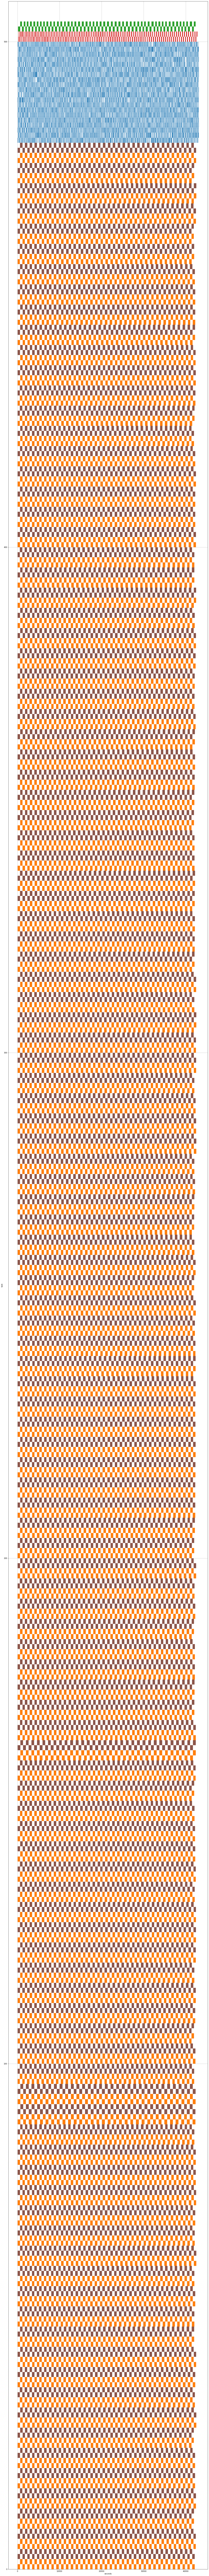

In [13]:
nnn=n_md
offset=0

import matplotlib.pyplot as plt 
fig, gnt = plt.subplots(figsize=(20, 2*(1 + nnn + n_ml + n_aggregators)) )

gnt.set_xlabel('seconds') 
gnt.set_ylabel('task')

gnt.set_ylim([0, 4*(1 + n_ml +nnn + n_aggregators)-20])

gnt.grid(True)

pfd[0+offset]['simulation.step'].start

sh = 0
h=1


for i in range(offset,nnn+offset):
    z = pfd[i]['simulation.step']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:orange'), label="niterations of the simulation")

    sh += h    
    
    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:orange'))

    sh += h
        
    z = pfd[i]['simulation.big']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:brown'), label="simulation")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:brown'))

    sh += h
    
for i in range(n_aggregators):
    z = pfd[n_md+i+offset]['aggregator_internal_loop']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:blue', label="aggregator")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:blue')

    sh += h


for i in range(n_ml):
    z = pfd[n_md+n_aggregators+i+offset]['cvae_iteration']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:red', label="CVAE training")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:red')

    sh += h

z = pfd[n_md+n_ml + n_aggregators+offset]['outlier_search']
zz = list(zip(z.start - pf.gps.min(), z.duration))

zz1 = zz[0:len(zz):2]
gnt.broken_barh(zz1, (sh, h), facecolors ='tab:green', label="Outlier search")

sh += h

zz1 = zz[1:len(zz):2]
gnt.broken_barh(zz1, (sh, h), facecolors ='tab:green')

# gnt.legend()

plt.savefig("gantt2.png")

Text(0.5, 0, 'duration, seconds')

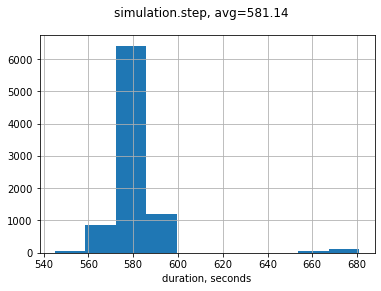

In [14]:
label = 'simulation.step'
merged_simulation_step = pfd[0+offset][label].copy()
for u in range(1+offset,n_md+offset):
    merged_simulation_step = merged_simulation_step.append(pfd[u][label])
fig, axs = plt.subplots(1,1)
merged_simulation_step['duration'].hist()
fig.suptitle(f"{label}, avg={merged_simulation_step.duration.mean():.2f}")
axs.set_xlabel("duration, seconds")

In [15]:
merged_simulation_step.describe()

,start,end,duration,start1,end1,duration1,unit
count,8.708000e+03,8.708000e+03,8708.000000,8.708000e+03,8.708000e+03,8708.000000,8708.000000
mean,1.616210e+09,1.616211e+09,581.138723,2.153816e+06,2.154397e+06,581.147017,59.596004
std,1.219502e+04,1.219755e+04,14.385624,4.337818e+05,4.337824e+05,14.376953,34.651512
min,1.616189e+09,1.616190e+09,545.000000,2.920249e+05,2.925948e+05,545.405941,0.000000
25%,1.616200e+09,1.616200e+09,576.000000,2.282853e+06,2.283426e+06,575.910295,30.000000
50%,1.616210e+09,1.616211e+09,579.000000,2.295475e+06,2.296052e+06,579.383360,60.000000
75%,1.616221e+09,1.616221e+09,583.000000,2.308046e+06,2.308631e+06,583.253734,90.000000
max,1.616231e+09,1.616232e+09,681.000000,2.320772e+06,2.321348e+06,680.876774,119.000000


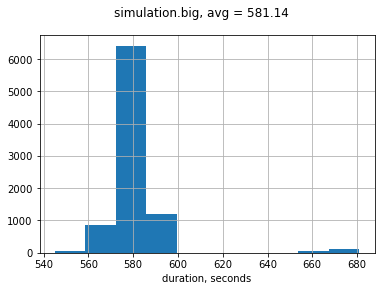

In [16]:
label = 'simulation.big'
merged_simulation_big = pfd[0+offset][label].copy()
for u in range(1+offset,n_md+offset):
    merged_simulation_big = merged_simulation_big.append(pfd[u][label])
fig, axs = plt.subplots(1,1)
merged_simulation_big['duration'].hist()
fig.suptitle(f"{label}, avg = {merged_simulation_big.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

In [17]:
merged_simulation_big.describe()

,start,end,duration,start1,end1,duration1,unit
count,8.708000e+03,8.708000e+03,8708.000000,8.708000e+03,8.708000e+03,8708.000000,8708.000000
mean,1.616210e+09,1.616211e+09,581.143776,2.153816e+06,2.154397e+06,581.152775,59.596004
std,1.219502e+04,1.219755e+04,14.384337,4.337818e+05,4.337824e+05,14.376742,34.651512
min,1.616189e+09,1.616190e+09,545.000000,2.920249e+05,2.925948e+05,545.413070,0.000000
25%,1.616200e+09,1.616200e+09,576.000000,2.282853e+06,2.283426e+06,575.919943,30.000000
50%,1.616210e+09,1.616211e+09,579.000000,2.295475e+06,2.296052e+06,579.388753,60.000000
75%,1.616221e+09,1.616221e+09,583.000000,2.308046e+06,2.308631e+06,583.257626,90.000000
max,1.616231e+09,1.616232e+09,681.000000,2.320772e+06,2.321348e+06,680.880489,119.000000


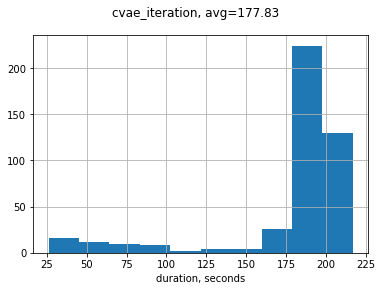

In [18]:
label = 'cvae_iteration'
merged_cvae_iteration = pfd[n_md+n_aggregators+offset][label].copy()
for u in range(n_md+n_aggregators+offset, n_md+n_aggregators+n_ml+offset):
    merged_cvae_iteration = merged_cvae_iteration.append(pfd[u][label])
fig, axs = plt.subplots(1,1)
merged_cvae_iteration.duration.hist()
fig.suptitle(f"{label}, avg={merged_cvae_iteration.duration.mean():.2f}")
axs.set_xlabel(f"duration, seconds");

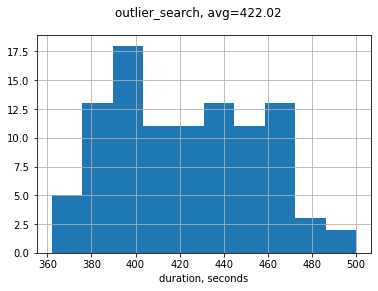

In [19]:
label = 'outlier_search'
merged_outlier_search = pfd[n_md+n_ml+n_aggregators+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_outlier_search.duration.hist()
fig.suptitle(f"{label}, avg={merged_outlier_search.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

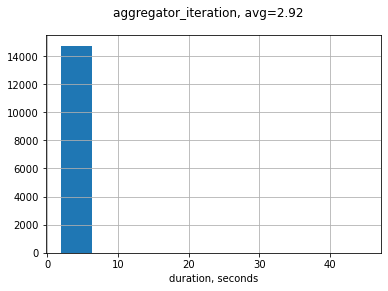

In [20]:
label = 'aggregator_iteration'
merged_aggregator_iteration = pfd[n_md+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_aggregator_iteration.duration.hist()
fig.suptitle(f"{label}, avg={merged_aggregator_iteration.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

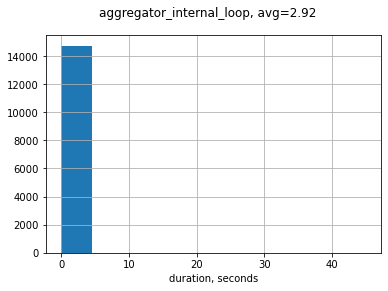

In [21]:
label = 'aggregator_internal_loop'
merged_aggregator_internal_loop = pfd[n_md+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_aggregator_internal_loop.duration.hist()
fig.suptitle(f"{label}, avg={merged_aggregator_internal_loop.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

label = 'lock_wait'
merged_lock_wait = pfd[0+offset][label].copy()
for u in range(1+offset,n_md+offset):
    try:
        merged_lock_wait = merged_lock_wait.append(pfd[u][label])
    except:
        pass
fig, axs = plt.subplots(1,1)
merged_lock_wait.duration.hist()
fig.suptitle(f"{label}, avg={merged_lock_wait.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

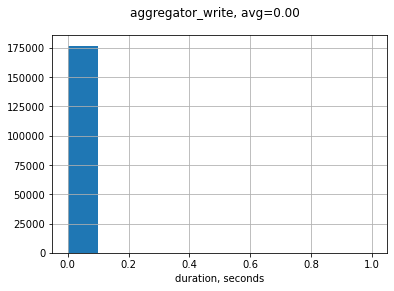

In [22]:
label = 'aggregator_write'
merged_aggregator_write = pfd[n_md+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_aggregator_write.duration.hist()
fig.suptitle(f"{label}, avg={merged_aggregator_write.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

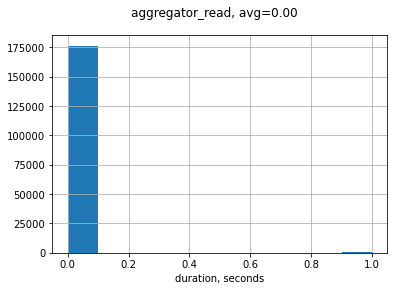

In [23]:
label = 'aggregator_read'
merged_aggregator_read = pfd[n_md+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_aggregator_read.duration.hist()
fig.suptitle(f"{label}, avg={merged_aggregator_read.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

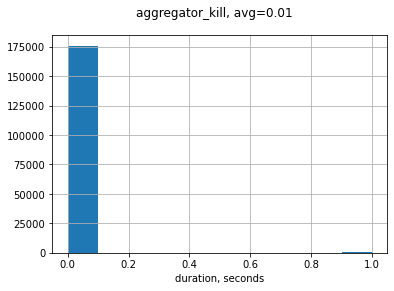

In [24]:
label = 'aggregator_kill'
merged_aggregator_kill = pfd[n_md+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_aggregator_kill.duration.hist()
fig.suptitle(f"{label}, avg={merged_aggregator_kill.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

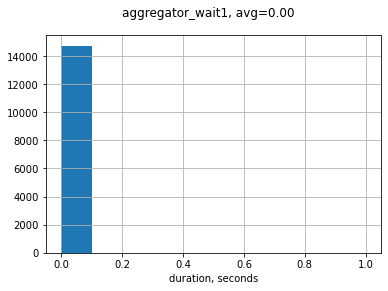

In [25]:
label = 'aggregator_wait1'
merged_aggregator_wait1 = pfd[n_md+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_aggregator_wait1.duration.hist()
fig.suptitle(f"{label}, avg={merged_aggregator_wait1.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

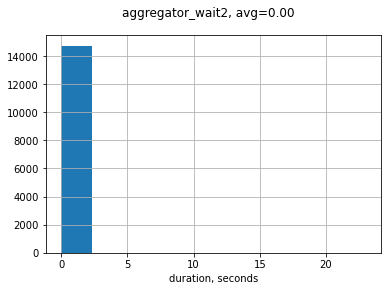

In [26]:
label = 'aggregator_wait2'
merged_aggregator_wait2 = pfd[n_md+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_aggregator_wait2.duration.hist()
fig.suptitle(f"{label}, avg={merged_aggregator_wait2.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

# Convergence

===== i=0 ======
          Unnamed: 0          fstep           step              R
count  176800.000000  176800.000000  176800.000000  176800.000000
mean    88399.500000   88399.500000    7366.166686       4.993188
std     51037.908134   51037.908134    4253.159034       1.111005
min         0.000000       0.000000       0.000000       3.103028
25%     44199.750000   44199.750000    3683.000000       4.260094
50%     88399.500000   88399.500000    7366.000000       4.682390
75%    132599.250000  132599.250000   11049.250000       5.396466
max    176799.000000  176799.000000   14734.000000      10.182828
===== i=1 ======
          Unnamed: 0          fstep           step              R
count  177700.000000  177700.000000  177700.000000  177700.000000
mean    88849.500000   88849.500000    7403.666680       4.970289
std     51297.715755   51297.715755    4274.809659       1.062922
min         0.000000       0.000000       0.000000       3.153877
25%     44424.750000   44424.750000    370

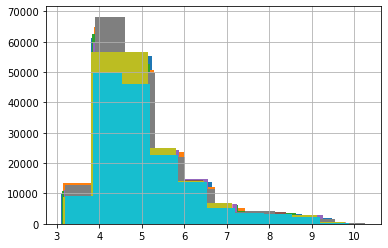

In [27]:
pf1 = []
for i in range(n_aggregators):
    pf1.append(pd.read_csv(f"{sdir}/aggregator{i}.csv"))

for i in range(n_aggregators):
    pf1[i].R.hist()
    
for i in range(n_aggregators):
    print(f"===== i={i} ======")
    print(pf1[i].describe())

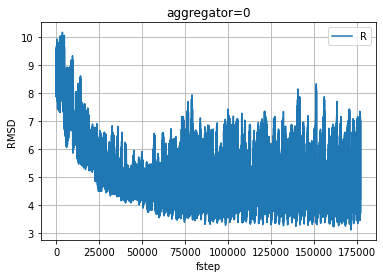

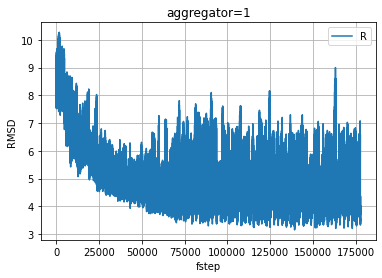

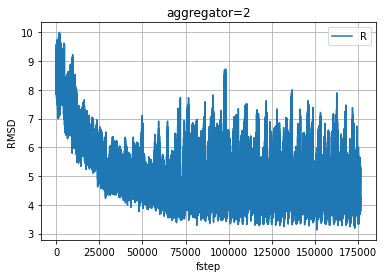

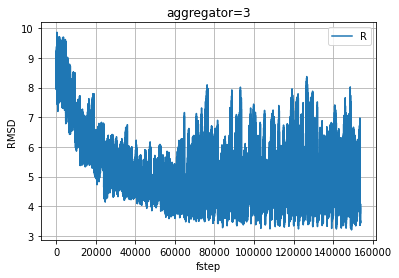

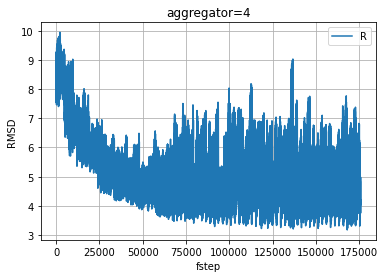

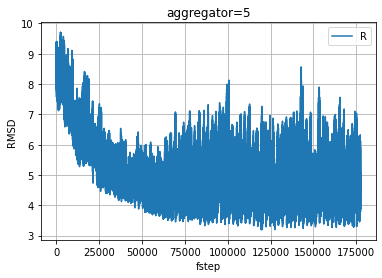

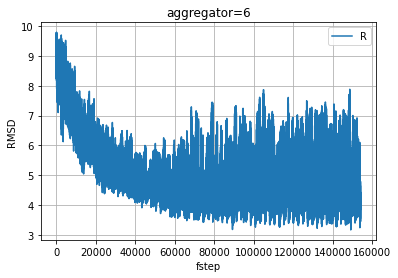

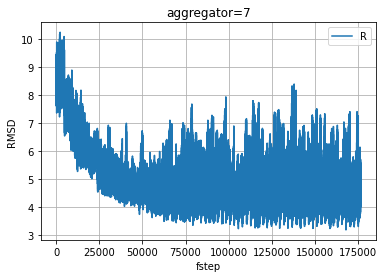

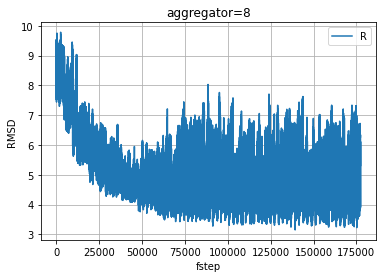

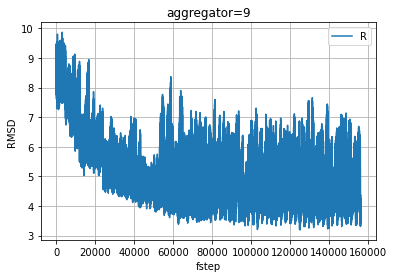

In [28]:
for i in range(n_aggregators):
    pf1[i].plot(x='fstep',y='R', grid=True, title = f'aggregator={i}', ylabel='RMSD')

In [29]:
def myaverage(R, window, step=1):
    averaged = []
    for i in range(0,len(R)-window, step):
        averaged.append(sum(R[i:i+window])/window)
    return averaged

In [30]:
def mymin(R, window, step=1):
    mins = []
    for i in range(0,len(R)-window, step):
        mins.append(min(R[i:i+window]))
    return mins

In [31]:
def mymax(R, window, step=1):
    maxs = []
    for i in range(0,len(R)-window, step):
        maxs.append(max(R[i:i+window]))
    return maxs

In [32]:
def mysmoothed(R, window=100, step=1):
    aRs = myaverage(R, window, step)
    mRs = mymin(R, window, step)
    xRs = mymax(R, window, step)
    smoothedR = pd.DataFrame(columns=['raverage','rmin', 'rmax'])
    smoothedR.raverage=aRs
    smoothedR.rmin=mRs
    smoothedR.rmax=xRs
 
    smoothedR.raverage.plot(grid=True, figsize=(20,10))
    smoothedR.rmin.plot(grid=True, figsize=(20,10))
    smoothedR.rmax.plot(grid=True, figsize=(20,10))
    
    return smoothedR

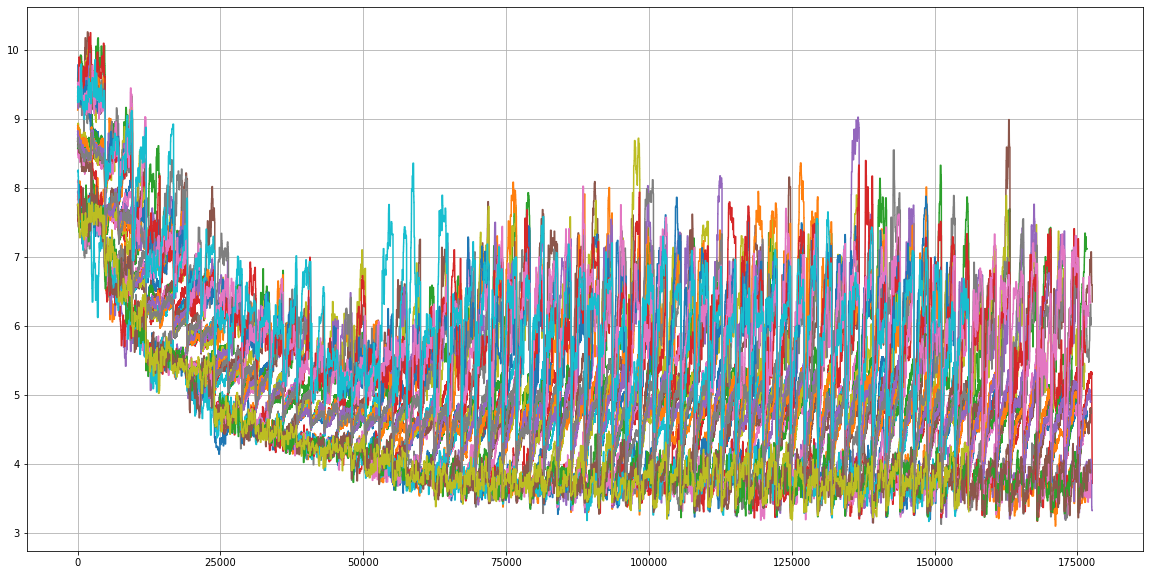

In [33]:
for i in range(n_aggregators):
    smoothedR = mysmoothed(pf1[i].R.tolist(), 100, 1)
 

In [35]:
frames = []

In [36]:
for csv_fn in csv_fns:
    df = pd.read_csv(csv_fn, names=['md5','RMSD'], header=0)
    frames.append(df)

fig, axes = plt.subplots(nrows=len(frames), ncols=1, figsize=(4, 75))
fig.tight_layout(pad=3)
i = 0
for fr in frames:
    fr.RMSD.hist(ax=axes[i],log=True); axes[i].set_xlim([3,10.5]); axes[i].set_xlabel('RMSD'); 
    axes[i].set_title(f"Outlier search iteration {i}"); 
    i += 1

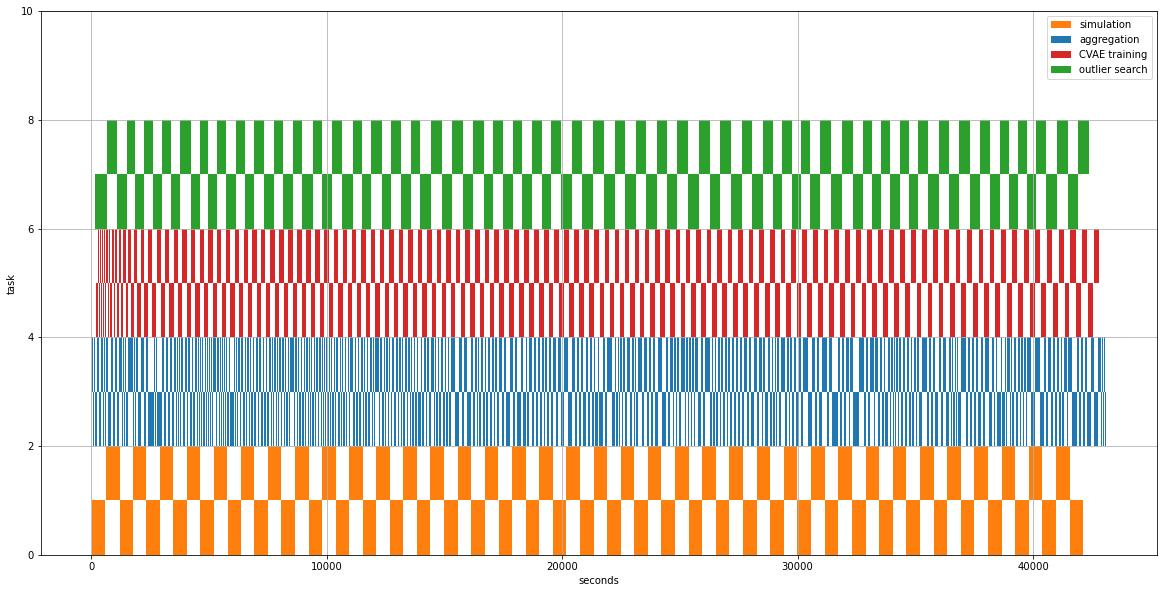

In [37]:
nnn=n_md
offset=0

import matplotlib.pyplot as plt 
fig, gnt = plt.subplots(figsize=(20, 10)) 

gnt.set_xlabel('seconds') 
gnt.set_ylabel('task')

gnt.set_ylim([0, 10])

gnt.grid(True)

pfd[0+offset]['simulation.step'].start

sh = 0
h=1


for i in range(offset,offset+1):
    z = pfd[i]['simulation.step']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:orange'), label="simulation")

    sh += h    
    
    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:orange'))

    sh += h
    '''    
    z = pfd[i]['simulation.big']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:brown'), label="simulation")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:brown'))

    sh += h
    '''
    
for i in range(1):
    z = pfd[n_md+i+offset]['aggregator_internal_loop']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:blue', label="aggregation")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:blue')

    sh += h


for i in range(1):
    z = pfd[n_md+n_aggregators+i+offset]['cvae_iteration']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:red', label="CVAE training")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:red')

    sh += h

z = pfd[n_md + n_aggregators + n_ml +offset]['outlier_search']
zz = list(zip(z.start - pf.gps.min(), z.duration))

zz1 = zz[0:len(zz):2]
gnt.broken_barh(zz1, (sh, h), facecolors ='tab:green', label="outlier search")

sh += h

zz1 = zz[1:len(zz):2]
gnt.broken_barh(zz1, (sh, h), facecolors ='tab:green')

gnt.legend()

plt.savefig("gantt2.png")

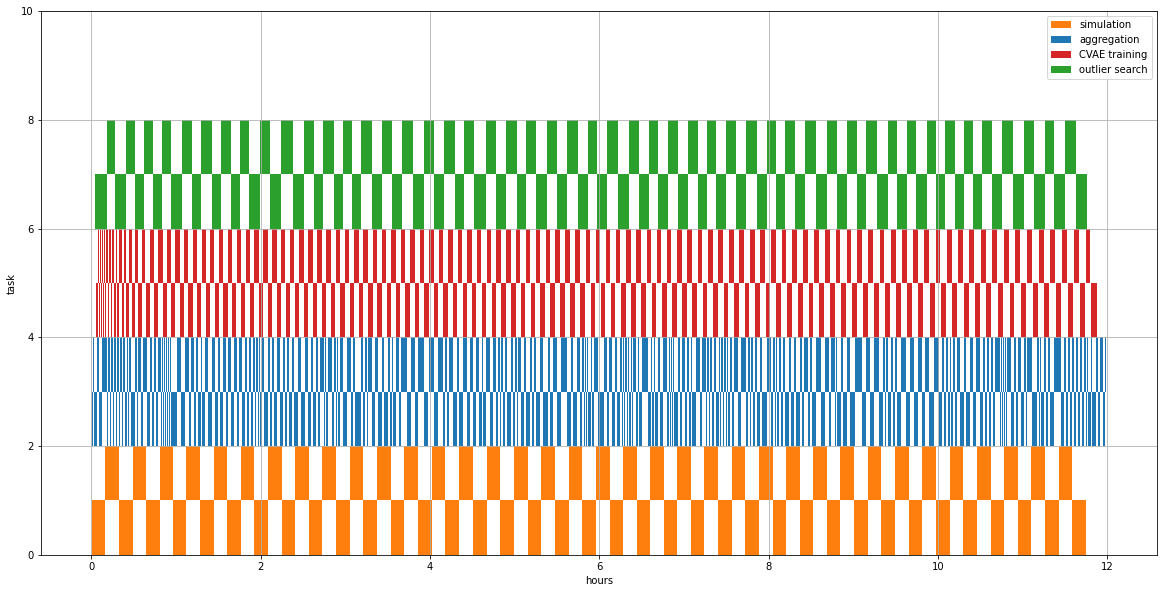

In [83]:
nnn=n_md
offset=0

import matplotlib.pyplot as plt 
fig, gnt = plt.subplots(figsize=(20, 10)) 

gnt.set_xlabel('hours') 
gnt.set_ylabel('task')

gnt.set_ylim([0, 10])

gnt.grid(True)

pfd[0+offset]['simulation.step'].start

sh = 0
h=1


for i in range(offset,offset+1):
    z = pfd[i]['simulation.step']
    zz = list(zip((z.start - pf.gps.min())/3600, z.duration/3600))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:orange'), label="simulation")

    sh += h    
    
    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:orange'))

    sh += h    
for i in range(1):
    z = pfd[n_md+i+offset]['aggregator_internal_loop']
    zz = list(zip((z.start - pf.gps.min())/3600, z.duration/3600))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:blue', label="aggregation")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:blue')

    sh += h


for i in range(1):
    z = pfd[n_md+n_aggregators+i+offset]['cvae_iteration']
    zz = list(zip((z.start - pf.gps.min())/3600, z.duration/3600))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:red', label="CVAE training")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:red')

    sh += h

z = pfd[n_md + n_aggregators + n_ml +offset]['outlier_search']
zz = list(zip((z.start - pf.gps.min())/3600, z.duration/3600))

zz1 = zz[0:len(zz):2]
gnt.broken_barh(zz1, (sh, h), facecolors ='tab:green', label="outlier search")

sh += h

zz1 = zz[1:len(zz):2]
gnt.broken_barh(zz1, (sh, h), facecolors ='tab:green')

gnt.legend()

plt.savefig("gantt2.png")

<AxesSubplot:title={'center':'aggregator=8'}, xlabel='fstep', ylabel='RMSD'>

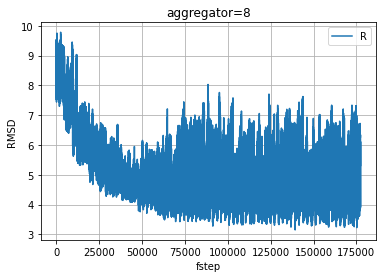

In [38]:
i=8
pf1[i].plot(x='fstep',y='R', grid=True, title = f'aggregator={i}', ylabel='RMSD')

In [39]:
pf1[i].describe()

,Unnamed: 0,fstep,step,R
count,177400.000000,177400.000000,177400.000000,177400.000000
mean,88699.500000,88699.500000,7391.166685,4.988166
std,51211.113214,51211.113214,4267.592791,1.071161
min,0.000000,0.000000,0.000000,3.149343
25%,44349.750000,44349.750000,3695.000000,4.280342
50%,88699.500000,88699.500000,7391.000000,4.689136
75%,133049.250000,133049.250000,11087.000000,5.389602
max,177399.000000,177399.000000,14784.000000,9.785186


In [40]:
mypf = pf1[i]

In [41]:
inhour=176499/12

In [42]:
inhour

14708.25

In [43]:
mypf["hour"] = mypf.fstep/inhour

In [44]:
mypf

,Unnamed: 0,fstep,step,R,hour
0,0,0,0,9.180989,0.000000
1,1,1,0,8.851301,0.000068
2,2,2,0,8.719103,0.000136
3,3,3,0,8.969214,0.000204
4,4,4,0,8.849694,0.000272
...,...,...,...,...,...
177395,177395,177395,14782,6.113282,12.060918
177396,177396,177396,14782,5.682555,12.060986
177397,177397,177397,14782,4.208720,12.061054
177398,177398,177398,14784,4.549467,12.061122


<AxesSubplot:xlabel='simulation time (h)', ylabel='RMSD'>

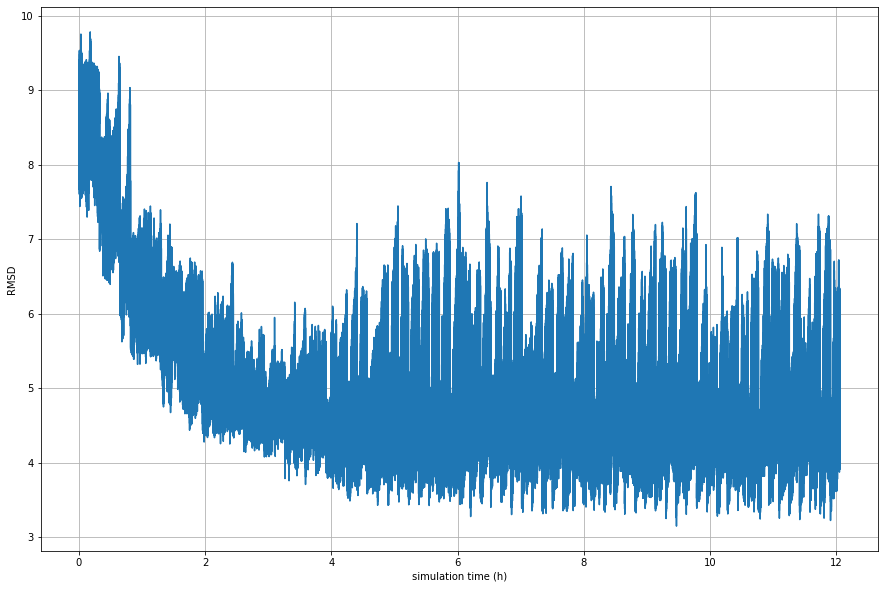

In [45]:
mypf.plot(x='hour',y='R', grid=True, ylabel='RMSD', xlabel='simulation time (h)', legend='', figsize=(15,10))

In [46]:
pfd[0].keys()

dict_keys(['prepare', 'lock4', 'find_best_pdb', 'openmm_simulate', 'pre_simulation', 'simulation.big', 'simulation.step', 'simulation_report', 'prepare_init'])

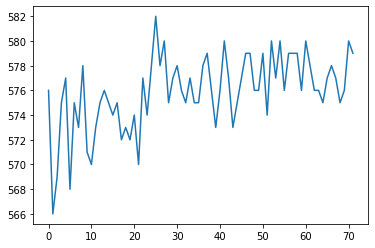

In [47]:
plt.plot(pfd[0]['simulation.step']['duration'].to_list()[1:])

(array([ 1.,  2.,  2.,  3.,  5., 16., 21.,  7., 14.,  1.]),
 array([566. , 567.6, 569.2, 570.8, 572.4, 574. , 575.6, 577.2, 578.8,
        580.4, 582. ]),
 <BarContainer object of 10 artists>)

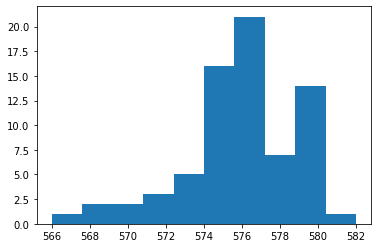

In [48]:
plt.hist(pfd[0]['simulation.step']['duration'].to_list()[1:])

In [49]:
simulation_step_0 = pfd[0]['simulation.step']['duration'][1:]

In [50]:
simulation_step_0.describe()

count     72.000000
mean     575.888889
std        3.037584
min      566.000000
25%      575.000000
50%      576.000000
75%      578.000000
max      582.000000
Name: duration, dtype: float64

In [51]:
pfd[0]['prepare_init']['duration'][1:].describe()

count    72.000000
mean      0.458333
std       0.648671
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       4.000000
Name: duration, dtype: float64

In [52]:
pfd[0].keys()

dict_keys(['prepare', 'lock4', 'find_best_pdb', 'openmm_simulate', 'pre_simulation', 'simulation.big', 'simulation.step', 'simulation_report', 'prepare_init'])

In [ ]:
pfd[0]['prepare_init']

In [62]:
pfd[131].keys()

dict_keys(['outlier_search', 'outlier_read', 'outlier_predict', 'outlier_eps', 'outlier_pdb', 'outlier_rmsd', 'outlier_lock'])

outlier_search
count    100.000000
mean     422.003799
std       32.938986
min      362.361822
25%      394.543782
50%      419.929444
75%      449.899374
max      498.545640
Name: duration, dtype: float64
outlier_read
count    101.000000
mean      33.608084
std        3.133424
min       18.645783
25%       31.466755
50%       33.562957
75%       35.655043
max       40.662342
Name: duration, dtype: float64
outlier_predict
count    101.000000
mean       4.471760
std        0.556460
min        1.926729
25%        4.399321
50%        4.458519
75%        4.512501
max        8.477864
Name: duration, dtype: float64
outlier_eps
count    101.000000
mean       3.148568
std        2.814951
min        0.545809
25%        1.567087
50%        1.583250
75%        4.632000
max       16.785455
Name: duration, dtype: float64
outlier_pdb
count    100.000000
mean     321.765181
std       27.576896
min      274.724362
25%      297.825889
50%      320.088010
75%      343.939469
max      375.504624
Name: du

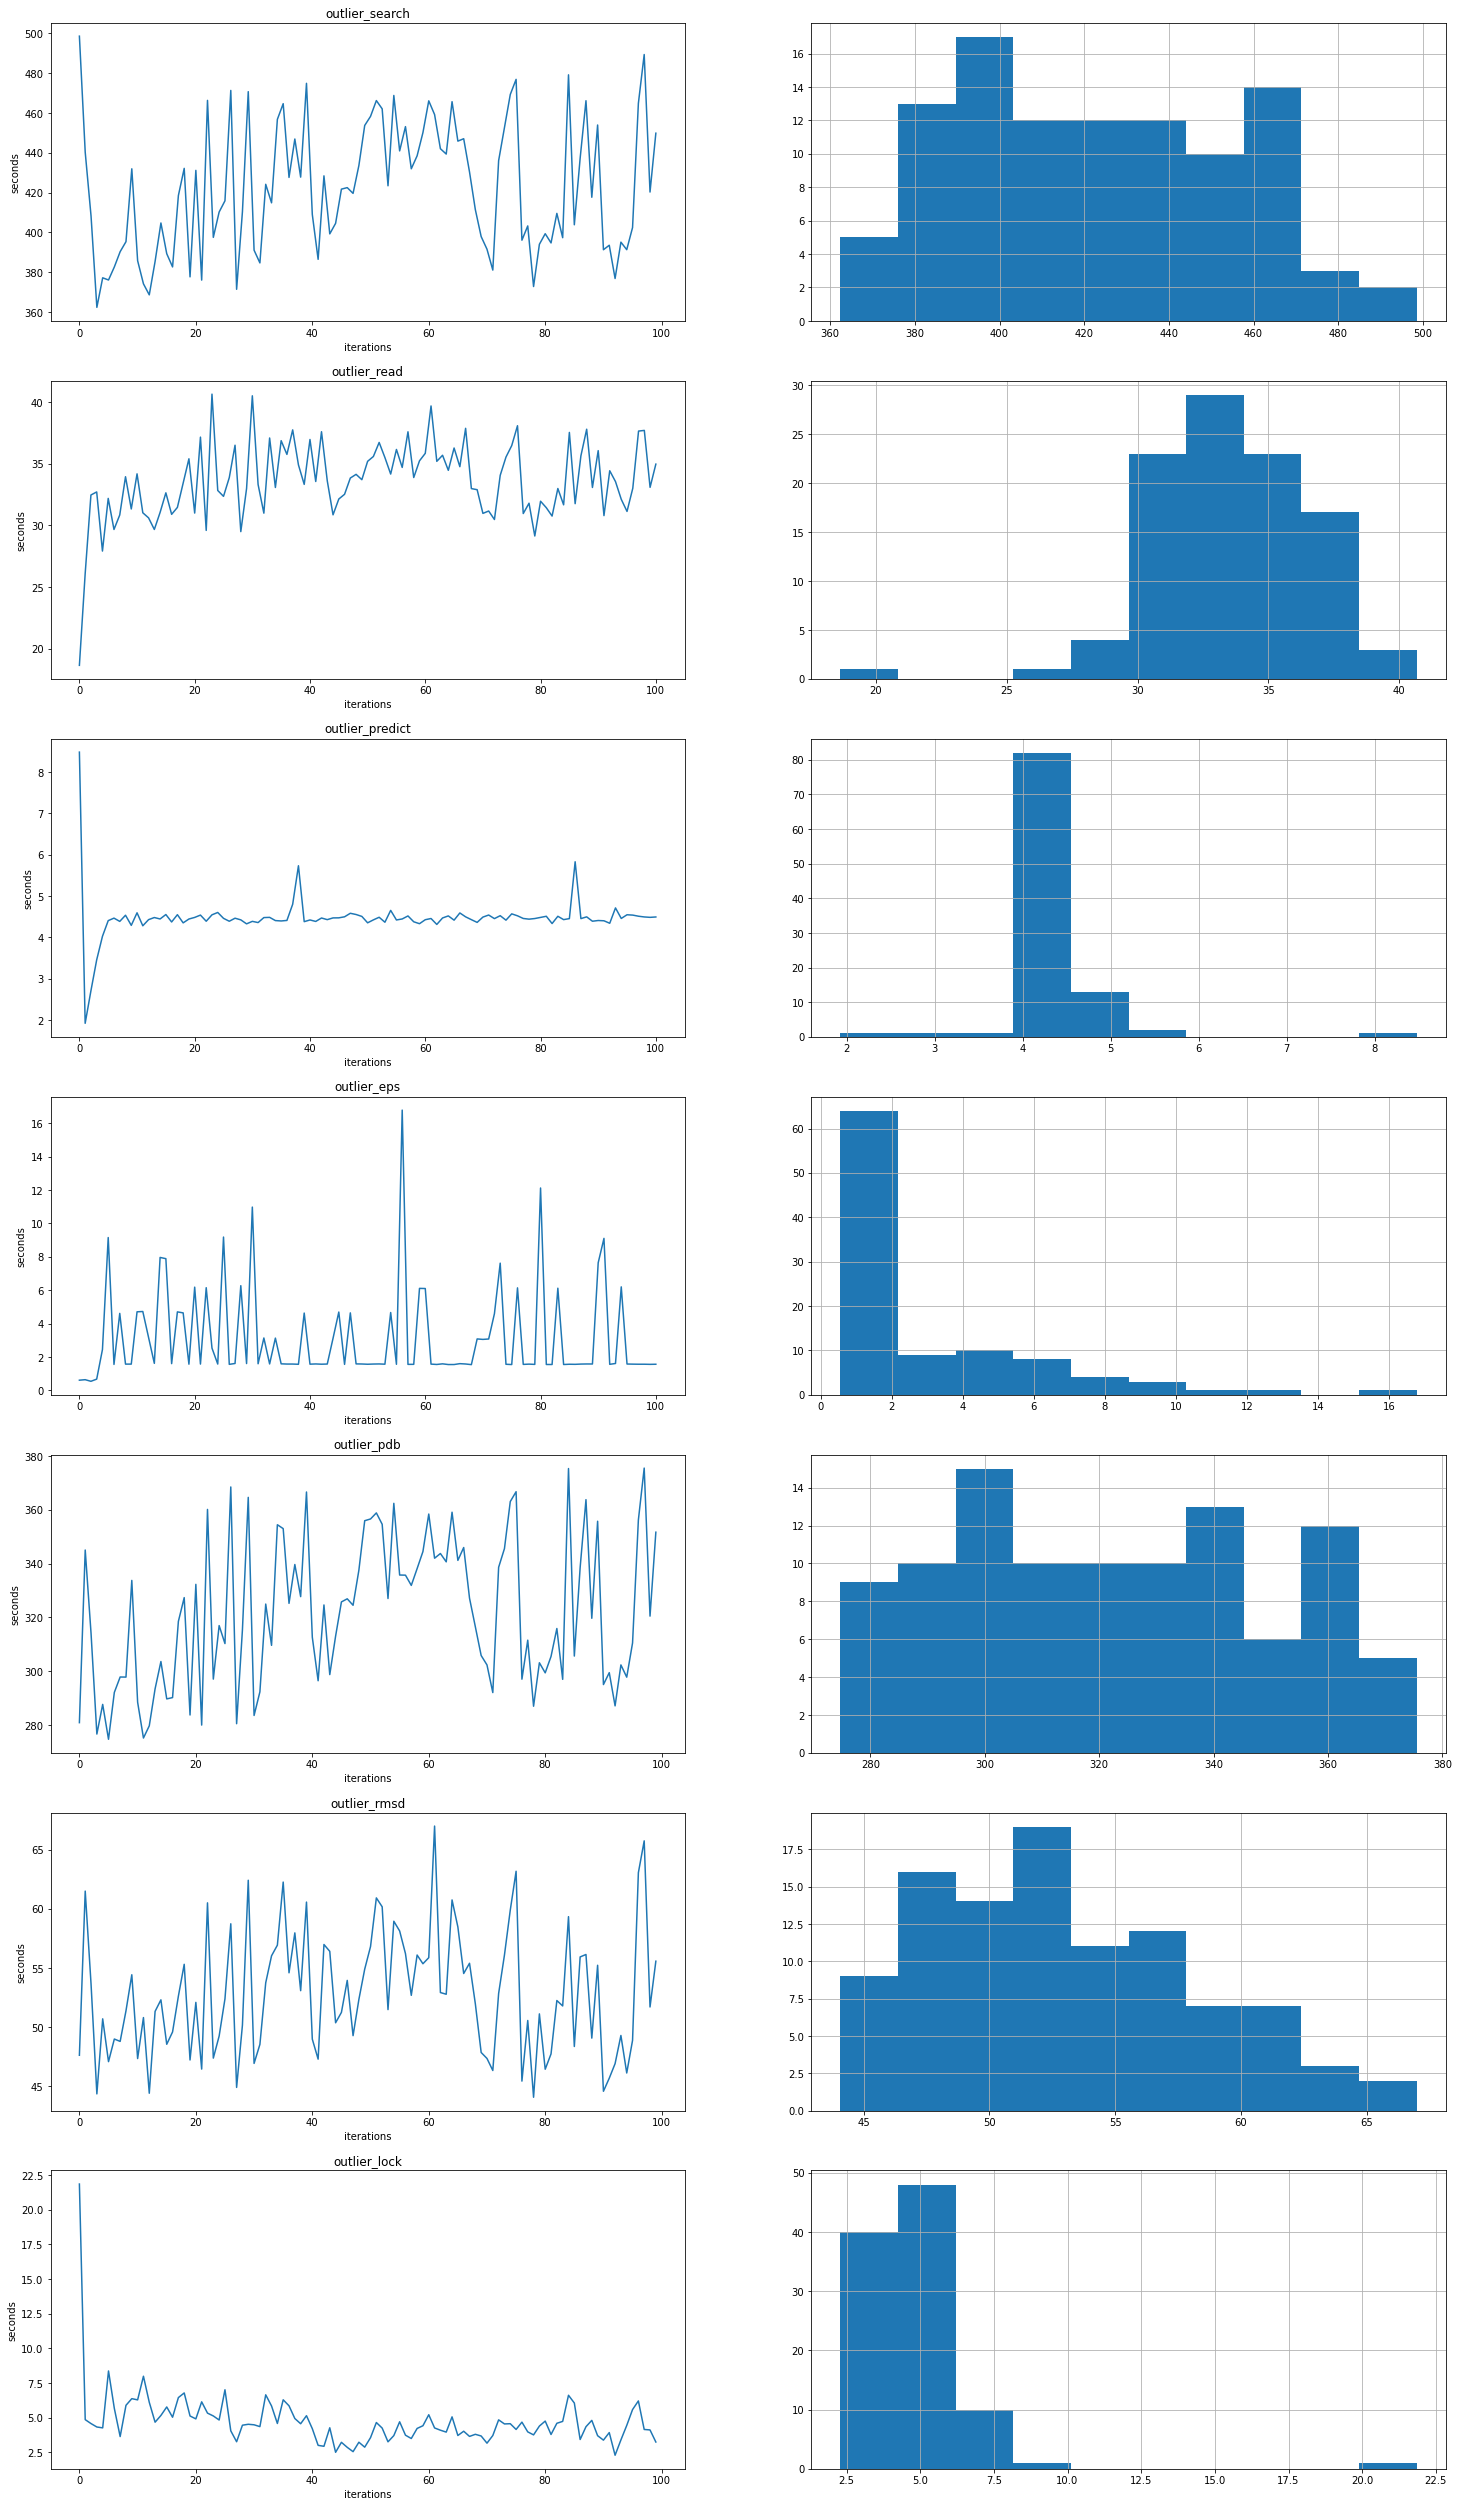

In [10]:
ind = 131
keys = list(pfd[ind].keys())
n = len(keys)
fig, axes = plt.subplots(nrows=n, ncols=2)
for i,k in enumerate(keys):
    pf = pfd[ind][k]['duration']
    pf.plot(ax=axes[i,0], title=k, figsize=(25,45), xlabel="iterations", ylabel="seconds")
    pf.hist(ax=axes[i,1], figsize=(25,45))
    print(k)
    print(pf.describe())
    print('='*30)

### Machine learning times

cvae_iteration
count    218.000000
mean     177.829528
std       43.888331
min       25.960694
25%      181.558303
50%      190.436954
75%      200.224191
max      216.736169
Name: duration, dtype: float64
cvae_read
count    218.000000
mean      96.329818
std       27.894644
min        4.934773
25%       96.158284
50%      103.621946
75%      111.016907
max      125.524286
Name: duration, dtype: float64


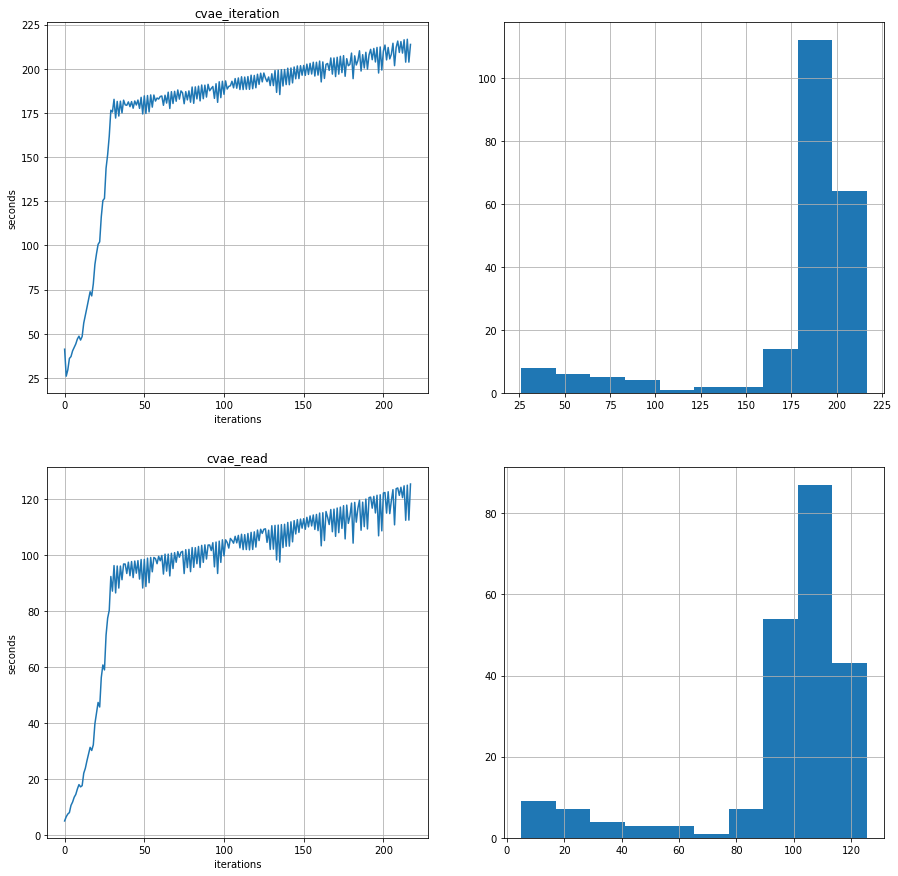

In [11]:
ind = 130
keys = list(pfd[ind].keys())
n = len(keys)
fig, axes = plt.subplots(nrows=n, ncols=2)
for i,k in enumerate(keys):
    pf = pfd[ind][k]['duration']
    pf.plot(ax=axes[i,0], title=k, figsize=(15,15), xlabel="iterations", ylabel="seconds", grid=True)
    pf.hist(ax=axes[i,1], figsize=(15,15))
    print(k)
    print(pf.describe())
    print('='*30)

cvae_train
count    218.000000
mean      81.499711
std       16.338965
min       19.521535
25%       85.131541
50%       86.818464
75%       88.479508
max       91.627773
Name: duration, dtype: float64


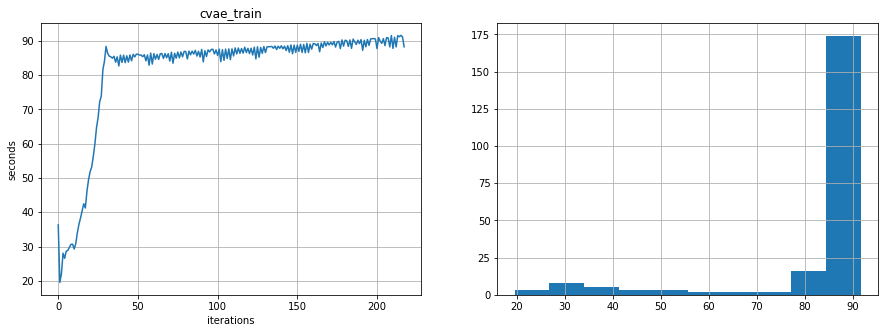

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pf = pfd[ind]['cvae_iteration']['duration'] - pfd[ind]['cvae_read']['duration']
pf.plot(ax=axes[0], title='cvae_train', figsize=(15,5), xlabel="iterations", ylabel="seconds", grid=True)
pf.hist(ax=axes[1], figsize=(15,5))
print('cvae_train')
print(pf.describe())
print('='*30)

### Aggregation times

aggregator_iteration
count    13015.000000
mean         3.311181
std          0.178835
min          2.725107
25%          3.276484
50%          3.302946
75%          3.337483
max         22.858959
Name: duration, dtype: float64
aggregator_wait1
count    13016.000000
mean         0.000114
std          0.000007
min          0.000100
25%          0.000112
50%          0.000113
75%          0.000114
max          0.000330
Name: duration, dtype: float64
aggregator_wait2
count    13016.000000
mean         0.001927
std          0.182959
min          0.000092
25%          0.000102
50%          0.000103
75%          0.000104
max         20.645624
Name: duration, dtype: float64
aggregator_internal_loop
count    13015.000000
mean         3.301383
std          0.064349
min          0.122978
25%          3.268648
50%          3.295099
75%          3.329554
max          4.722267
Name: duration, dtype: float64
aggregator_read
count    156191.000000
mean          0.002397
std           0.000471
min    

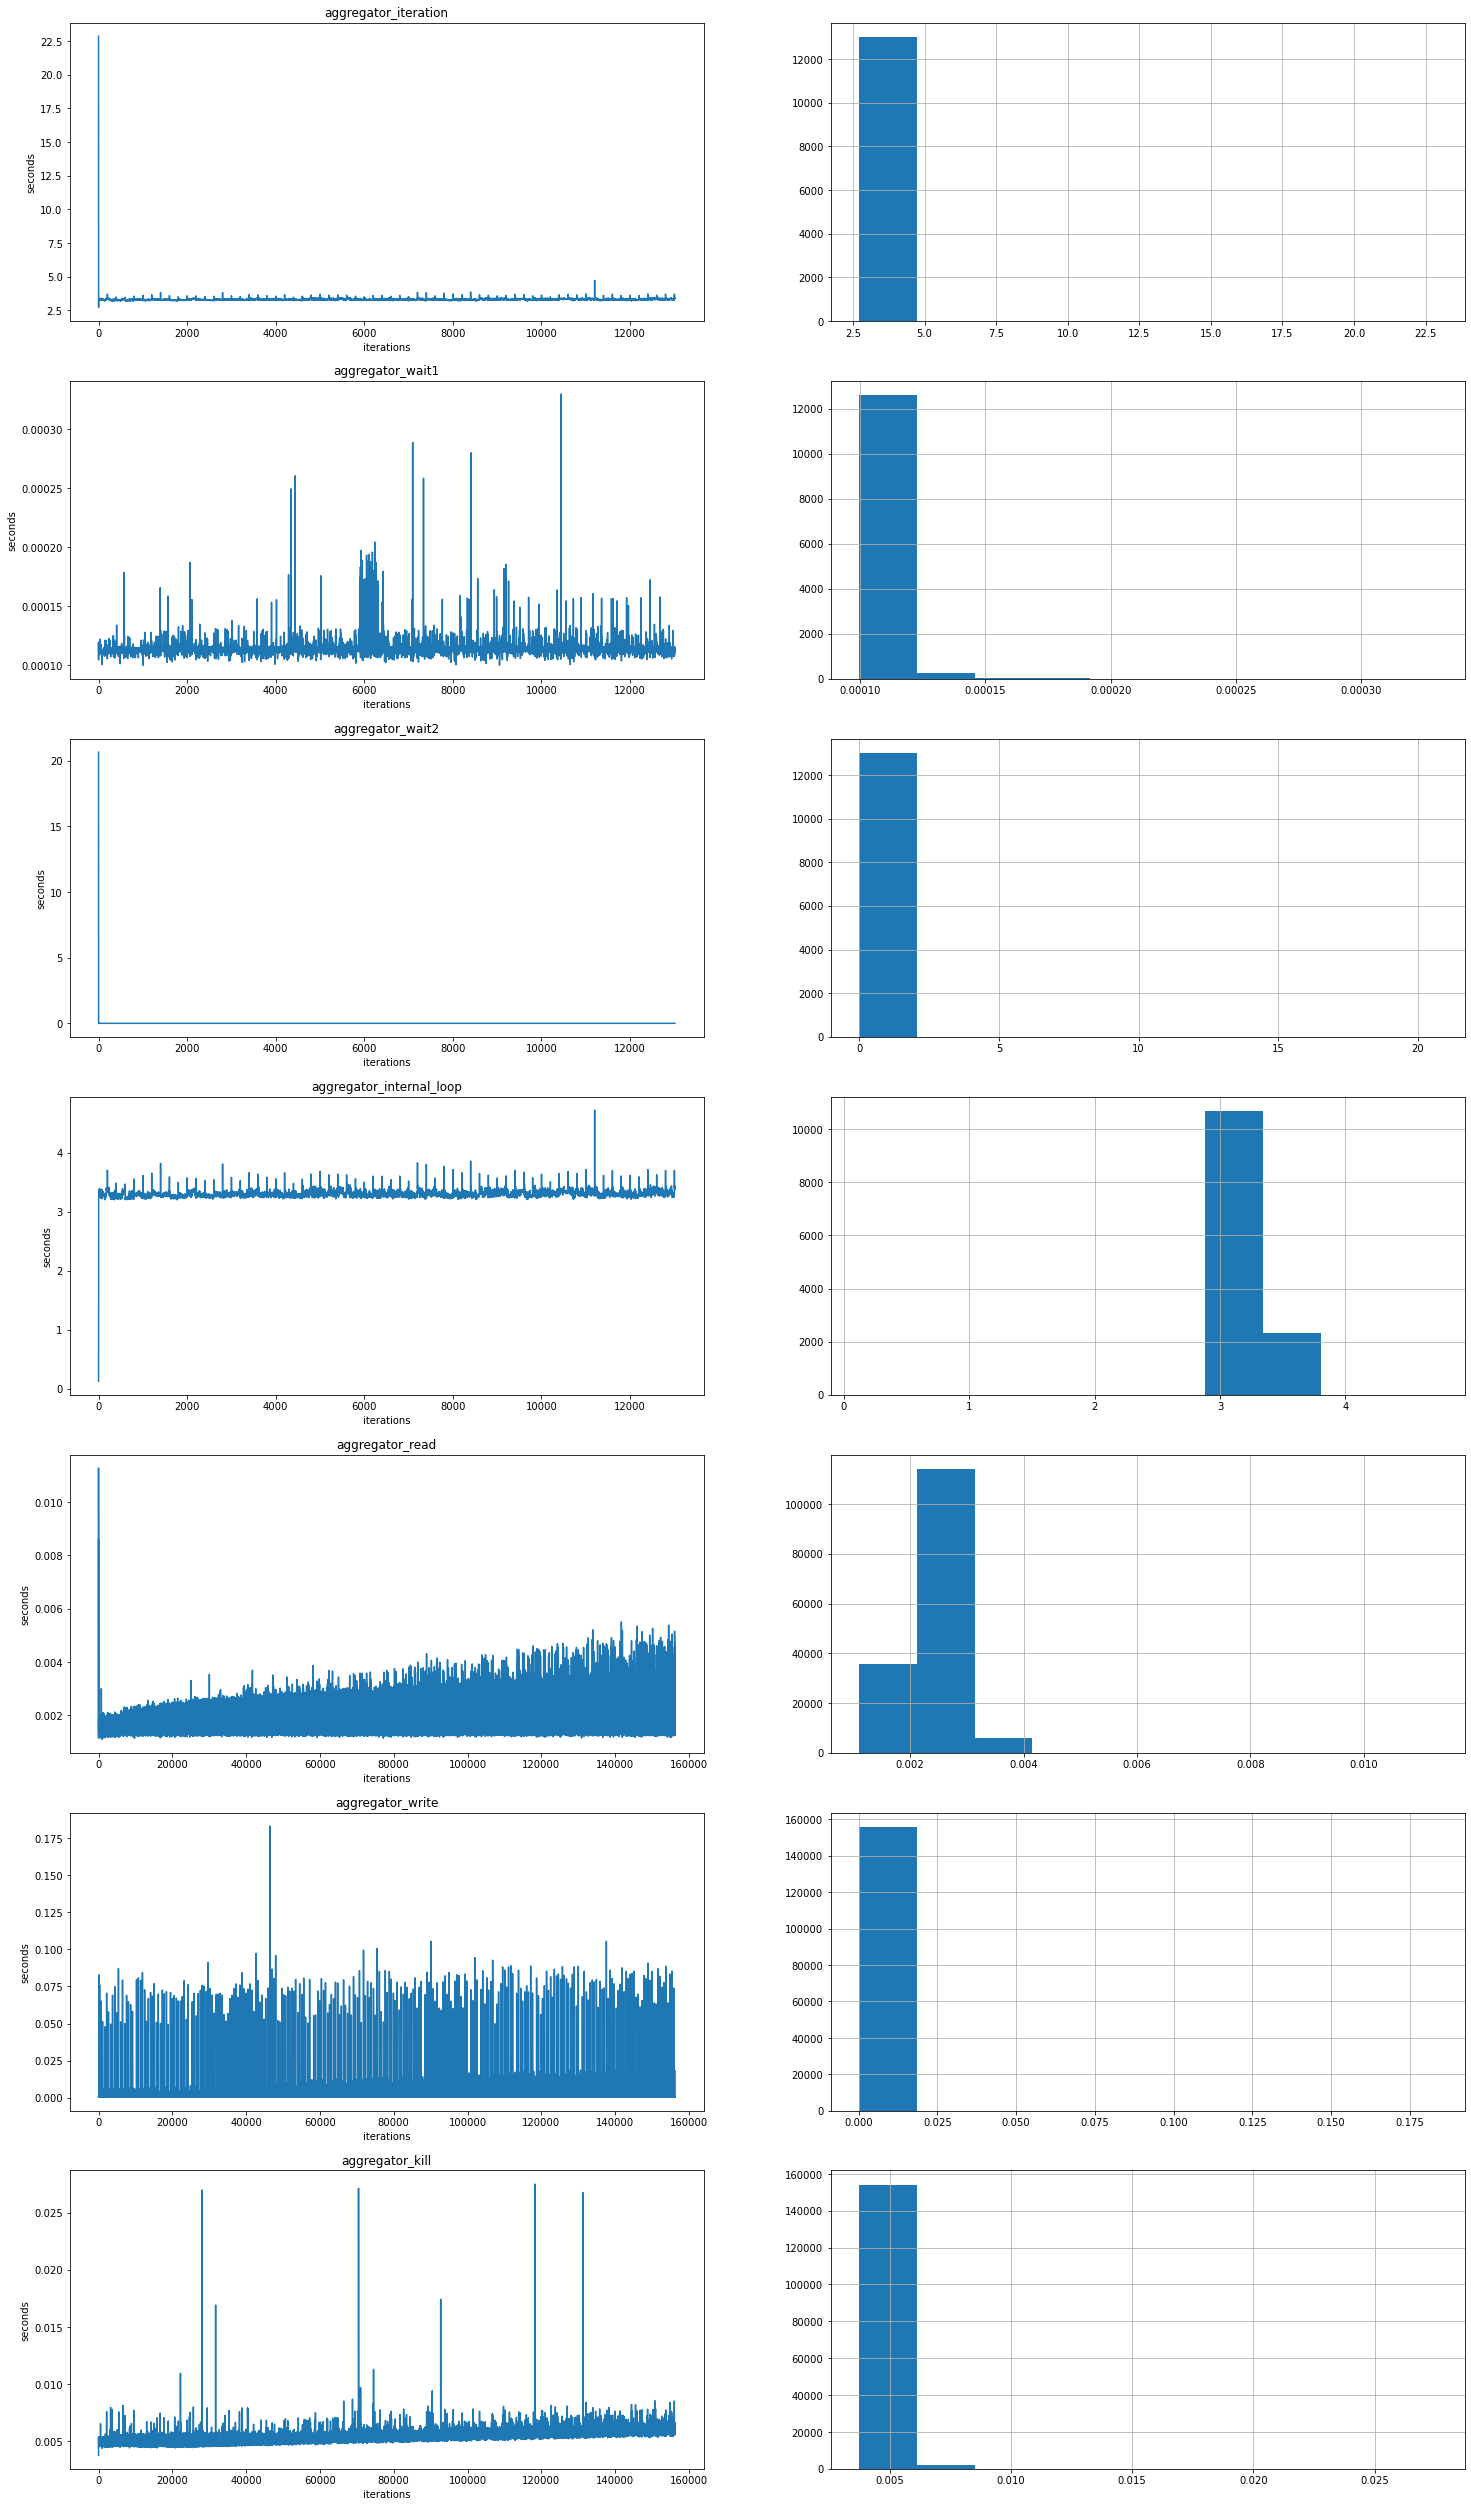

In [13]:
ind = 129
keys = list(pfd[ind].keys())
n = len(keys)
fig, axes = plt.subplots(nrows=n, ncols=2)
for i,k in enumerate(keys):
    pf = pfd[ind][k]['duration']
    pf.plot(ax=axes[i,0], title=k, figsize=(25,45), xlabel="iterations", ylabel="seconds")
    pf.hist(ax=axes[i,1], figsize=(25,45))
    print(k)
    print(pf.describe())
    print('='*30)

### Simulation times

simulation_report
count    14938.000000
mean         0.009755
std          0.011840
min          0.007570
25%          0.008225
50%          0.009569
75%          0.009828
max          1.436043
Name: duration, dtype: float64
prepare_init
count    73.000000
mean      0.899488
std       4.148150
min       0.257865
25%       0.332687
50%       0.359597
75%       0.398198
max      35.686906
Name: duration, dtype: float64
simulation.big
count     73.000000
mean     575.878011
std        2.964297
min      566.293704
25%      574.560283
50%      576.161648
75%      577.884472
max      581.598643
Name: duration, dtype: float64


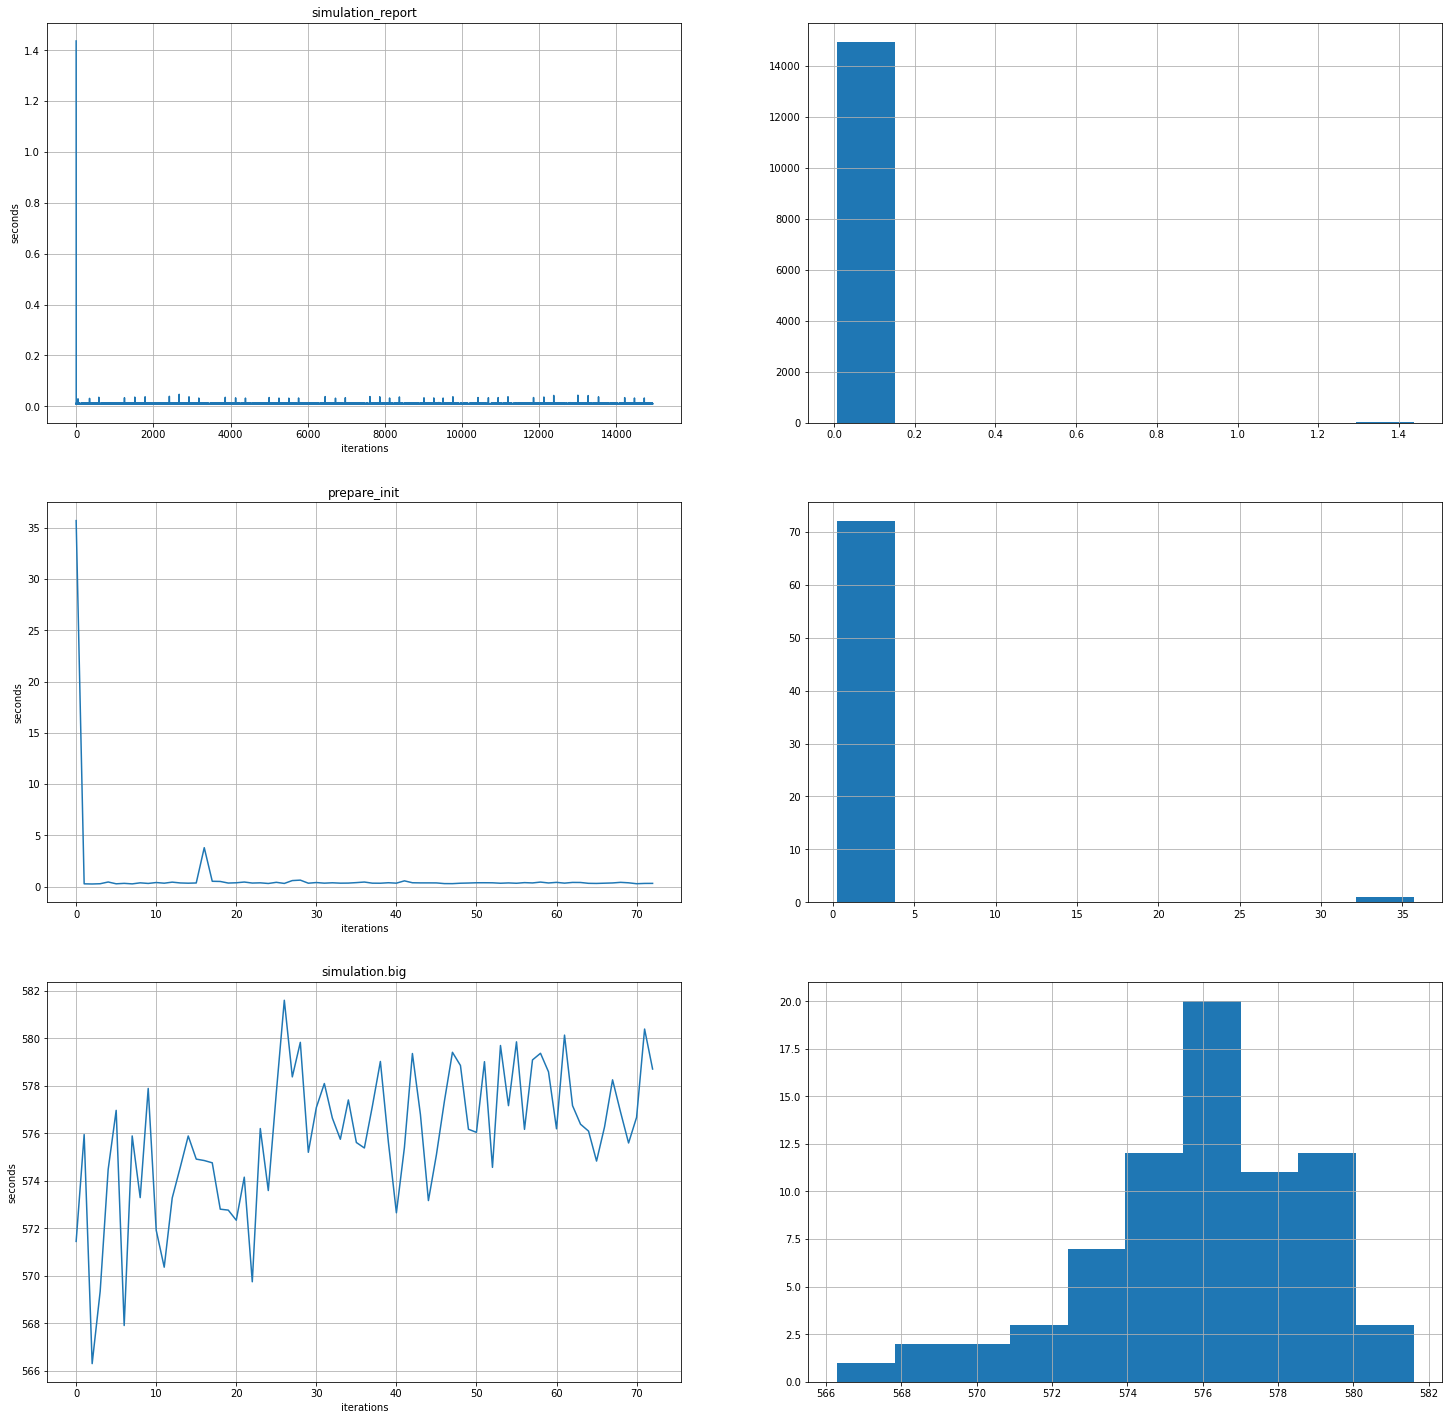

In [14]:
ind = 0
keys = list(pfd[ind].keys())
n = len(keys)

keys = list(set(keys) - set(['prepare', 'lock4', 'find_best_pdb', 'openmm_simulate', 'pre_simulation', 'simulation.step']))
fig, axes = plt.subplots(nrows=len(keys), ncols=2)

simulation_durations = {}

for i,k in enumerate(keys):
    pf = pfd[ind][k]['duration']
    simulation_durations[k] = pf.to_list()
    pf.plot(ax=axes[i,0], title=k, figsize=(25,25), xlabel="iterations", ylabel="seconds",grid=True)
    pf.hist(ax=axes[i,1], figsize=(25,25))
    print(k)
    print(pf.describe())
    print('='*30)

In [92]:
simulation_durations.keys()

dict_keys(['simulation.big', 'prepare_init', 'simulation_report'])

In [15]:
sum(simulation_durations['simulation.big']), sum(simulation_durations['prepare_init']), sum(simulation_durations['simulation_report'])

(42039.09477578243, 65.66260299645364, 145.71416039019823)

In [16]:
145.71416039019823/42039.09477578243*100

0.34661583739462476

## Outlier search timing details

outlier_search
count    100.000000
mean     422.003799
std       32.938986
min      362.361822
25%      394.543782
50%      419.929444
75%      449.899374
max      498.545640
Name: duration1, dtype: float64
outlier_read
count    101.000000
mean      33.608084
std        3.133424
min       18.645783
25%       31.466755
50%       33.562957
75%       35.655043
max       40.662342
Name: duration1, dtype: float64
outlier_predict
count    101.000000
mean       4.471760
std        0.556460
min        1.926729
25%        4.399321
50%        4.458519
75%        4.512501
max        8.477864
Name: duration1, dtype: float64
outlier_eps
count    101.000000
mean       3.148568
std        2.814951
min        0.545809
25%        1.567087
50%        1.583250
75%        4.632000
max       16.785455
Name: duration1, dtype: float64
outlier_pdb
count    100.000000
mean     321.765181
std       27.576896
min      274.724362
25%      297.825889
50%      320.088010
75%      343.939469
max      375.504624
Name

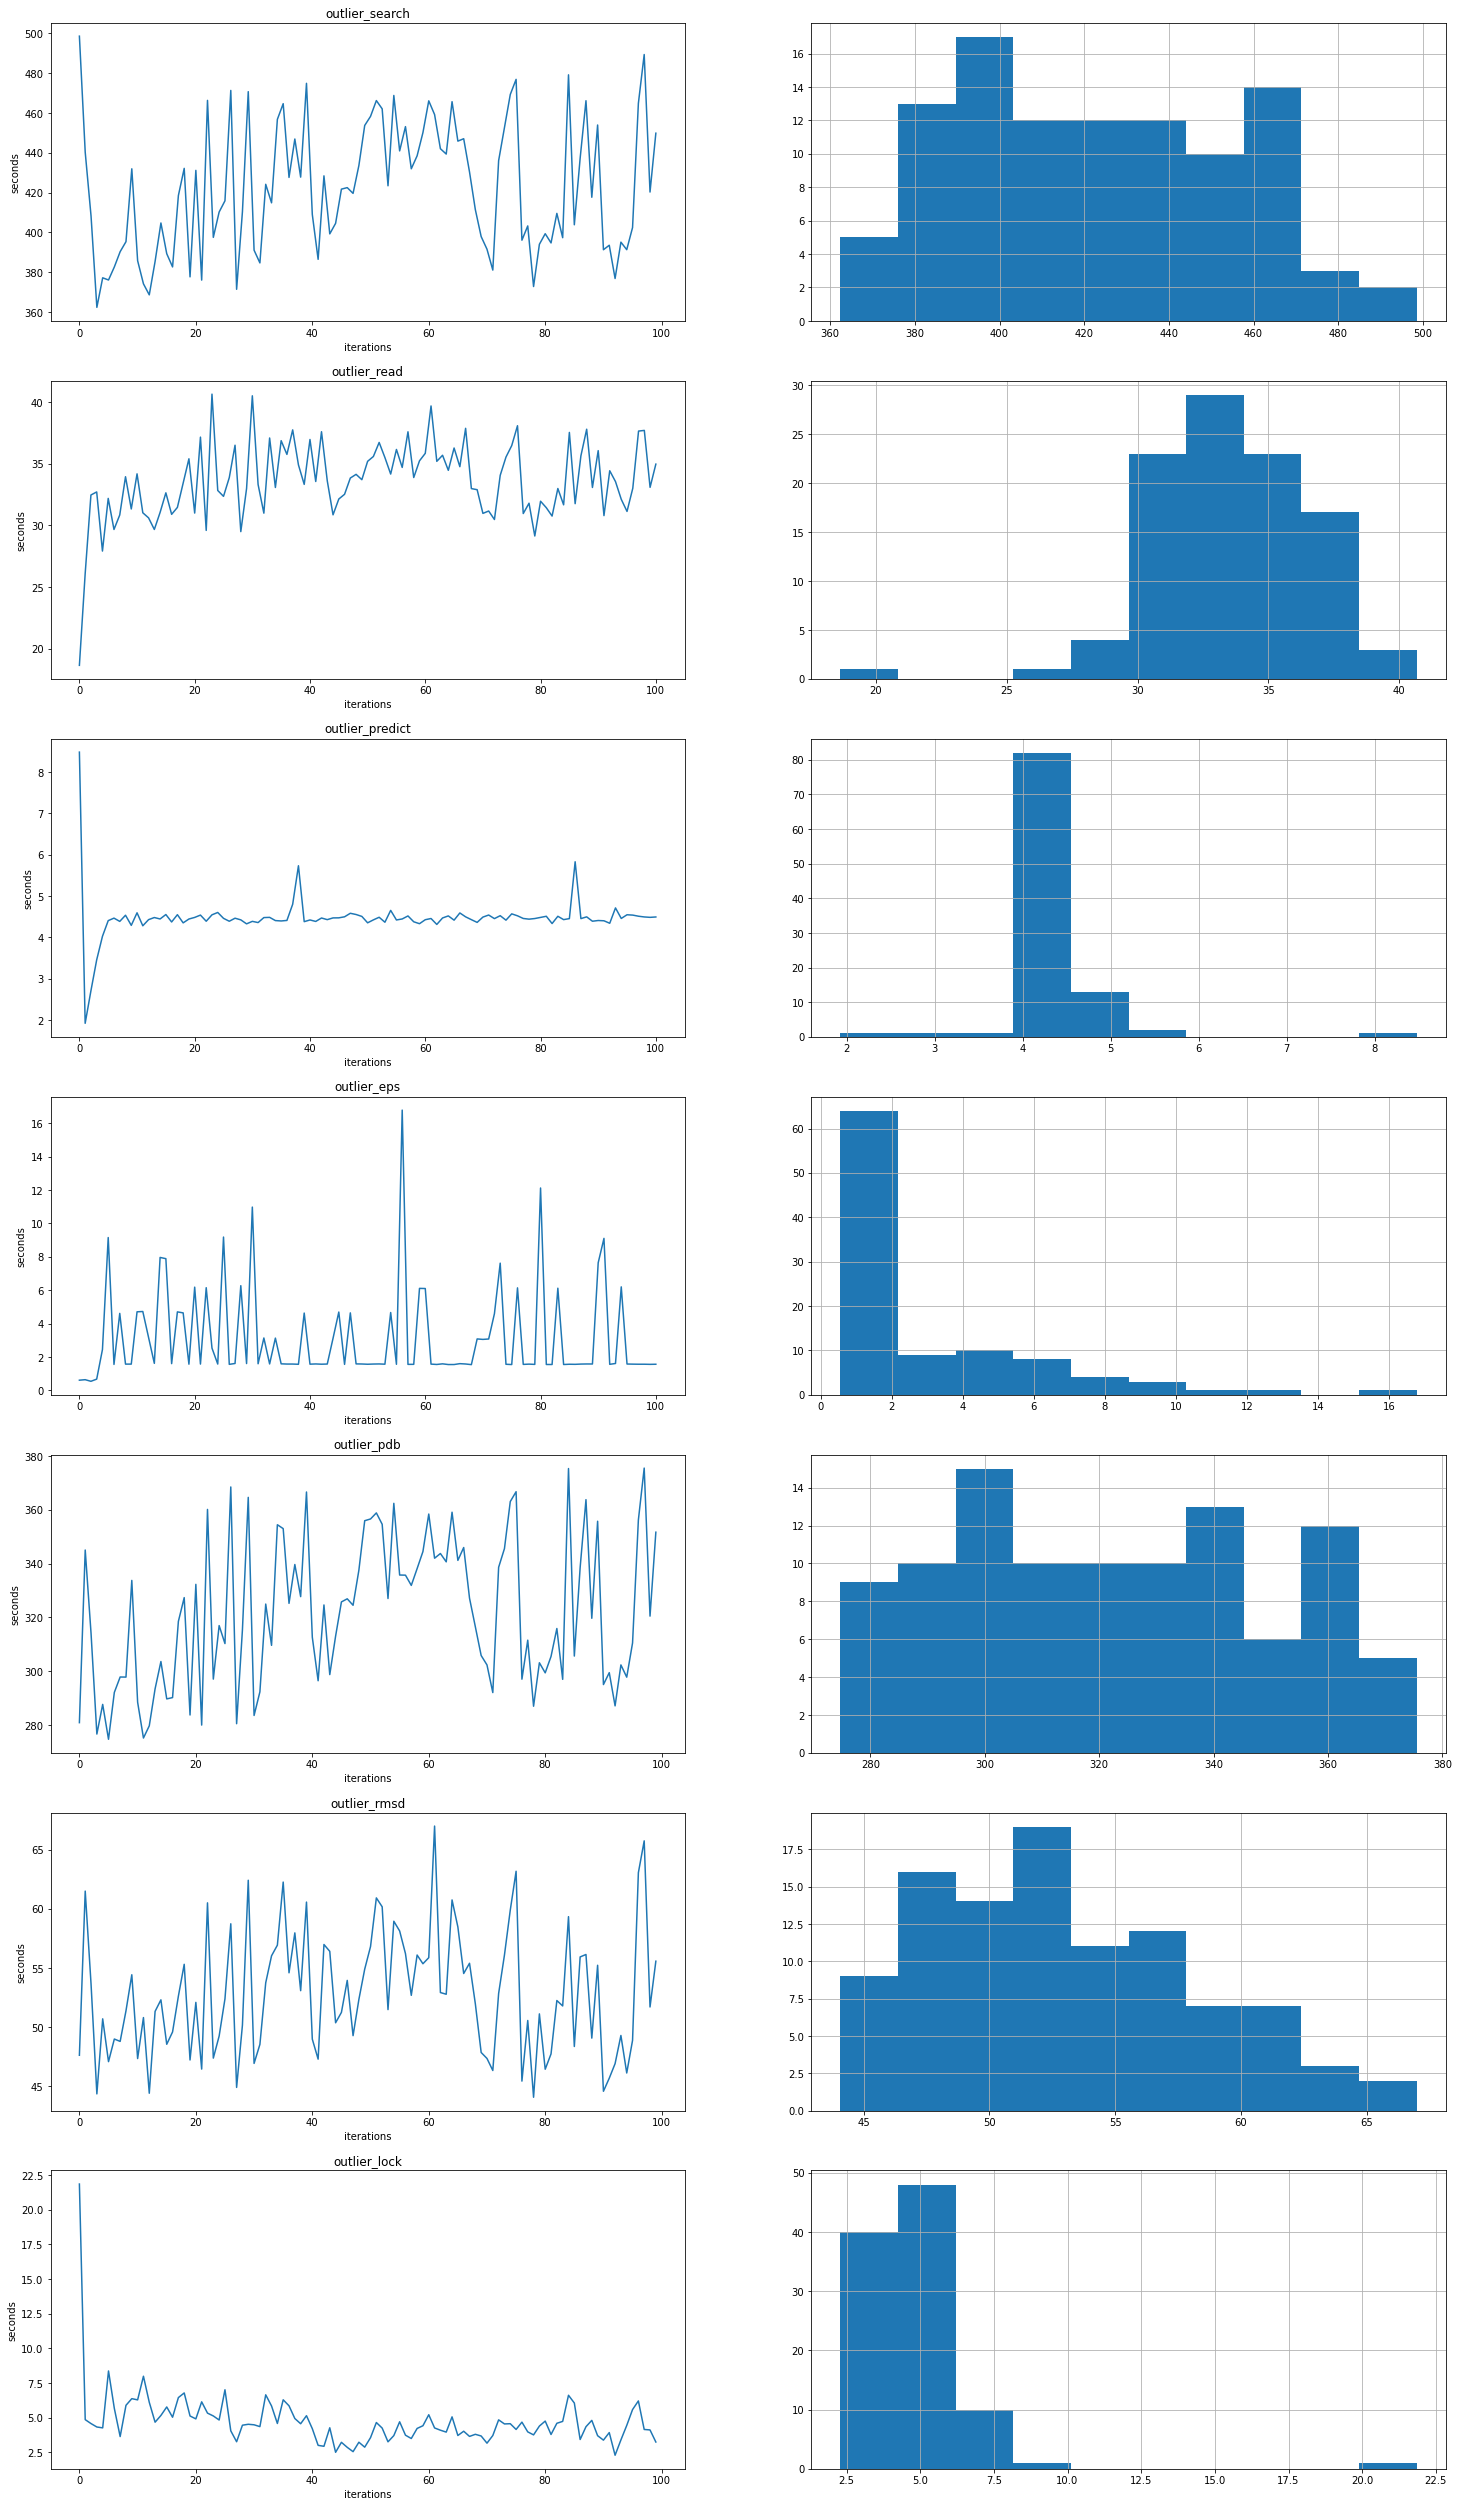

In [53]:
ind = 131
keys = list(pfd[ind].keys())
n = len(keys)
fig, axes = plt.subplots(nrows=n, ncols=2)
for i,k in enumerate(keys):
    pf = pfd[ind][k]['duration1']
    pf.plot(ax=axes[i,0], title=k, figsize=(25,45), xlabel="iterations", ylabel="seconds")
    pf.hist(ax=axes[i,1], figsize=(25,45))
    print(k)
    print(pf.describe())
    print('='*30)

In [54]:
total_outlier_search = sum(pfd[ind]['outlier_search']['duration1'])
total_outlier_read = sum(pfd[ind]['outlier_read']['duration1'])
total_outlier_predict = sum(pfd[ind]['outlier_predict']['duration1'])
total_outlier_eps = sum(pfd[ind]['outlier_eps']['duration1'])
total_outlier_pdb = sum(pfd[ind]['outlier_pdb']['duration1'])
total_outlier_rmsd = sum(pfd[ind]['outlier_rmsd']['duration1'])
total_outlier_lock = sum(pfd[ind]['outlier_lock']['duration1'])

In [55]:
p_outlier_read = total_outlier_read/total_outlier_search * 100
print(p_outlier_read)

8.043568477405923


In [56]:
p_outlier_predict = total_outlier_predict/total_outlier_search * 100
print(p_outlier_predict)

1.070245753979671


In [57]:
p_outlier_eps = total_outlier_eps/total_outlier_search*100
print(p_outlier_eps)

0.7535604892518768


In [58]:
p_outlier_pdb = total_outlier_pdb/total_outlier_search*100
print(p_outlier_pdb)

76.2469869878677


In [59]:
p_outlier_rmsd = total_outlier_rmsd/total_outlier_search*100
print(p_outlier_rmsd)

12.524905158279875


In [60]:
p_outlier_lock = total_outlier_lock/total_outlier_search*100
print(p_outlier_lock)

1.1230533811131507


## Machine Learning timing details

cvae_iteration
count    218.000000
mean     177.829528
std       43.888331
min       25.960694
25%      181.558303
50%      190.436954
75%      200.224191
max      216.736169
Name: duration1, dtype: float64
cvae_read
count    218.000000
mean      96.329818
std       27.894644
min        4.934773
25%       96.158284
50%      103.621946
75%      111.016907
max      125.524286
Name: duration1, dtype: float64


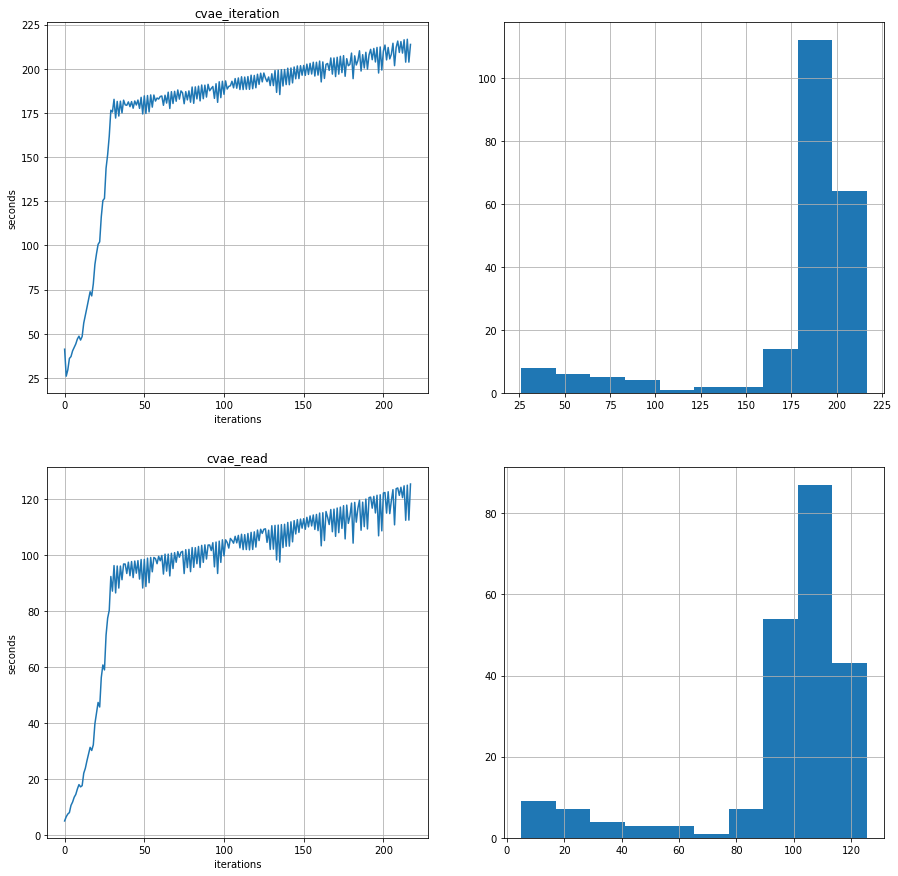

In [61]:
ind = 130
keys = list(pfd[ind].keys())
n = len(keys)
fig, axes = plt.subplots(nrows=n, ncols=2)
for i,k in enumerate(keys):
    pf = pfd[ind][k]['duration1']
    pf.plot(ax=axes[i,0], title=k, figsize=(15,15), xlabel="iterations", ylabel="seconds", grid=True)
    pf.hist(ax=axes[i,1], figsize=(15,15))
    print(k)
    print(pf.describe())
    print('='*30)

cvae_train
count    218.000000
mean      81.513761
std       16.307028
min       19.000000
25%       85.000000
50%       87.000000
75%       89.000000
max       92.000000
Name: duration, dtype: float64


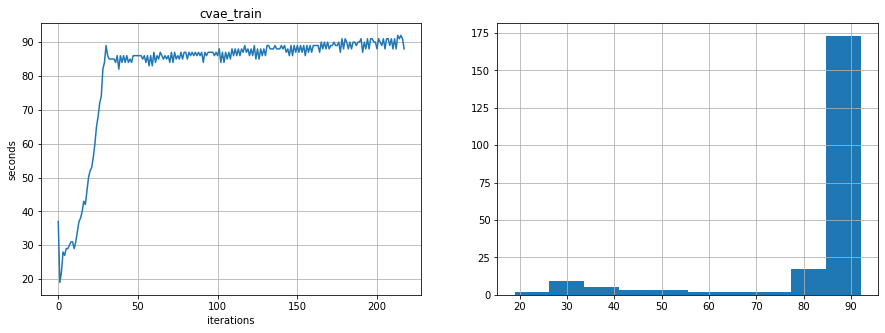

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pf = pfd[ind]['cvae_iteration']['duration'] - pfd[ind]['cvae_read']['duration']
pf.plot(ax=axes[0], title='cvae_train', figsize=(15,5), xlabel="iterations", ylabel="seconds", grid=True)
pf.hist(ax=axes[1], figsize=(15,5))
print('cvae_train')
print(pf.describe())
print('='*30)

In [63]:
total_cvae_iteration = sum(pfd[ind]['cvae_iteration']['duration1'])
total_cvae_read = sum(pfd[ind]['cvae_read']['duration1'])
total_cvae_train = total_cvae_iteration - total_cvae_read

In [64]:
p_cvae_train = total_cvae_train/total_cvae_iteration*100
print(p_cvae_train)

45.8302462145425


In [65]:
p_cvae_read = total_cvae_read/total_cvae_iteration*100
print(p_cvae_read)

54.16975378545751


## Simulation timing details

prepare_init
count    72.000000
mean      0.416329
std       0.410121
min       0.257865
25%       0.332102
50%       0.359348
75%       0.393118
max       3.797515
Name: duration1, dtype: float64
simulation.big
count     72.000000
mean     575.939617
std        2.937662
min      566.293704
25%      574.704373
50%      576.163539
75%      577.936199
max      581.598643
Name: duration1, dtype: float64
simulation_report
count    14937.000000
mean         0.009659
std          0.001994
min          0.007570
25%          0.008225
50%          0.009569
75%          0.009828
max          0.046923
Name: duration1, dtype: float64


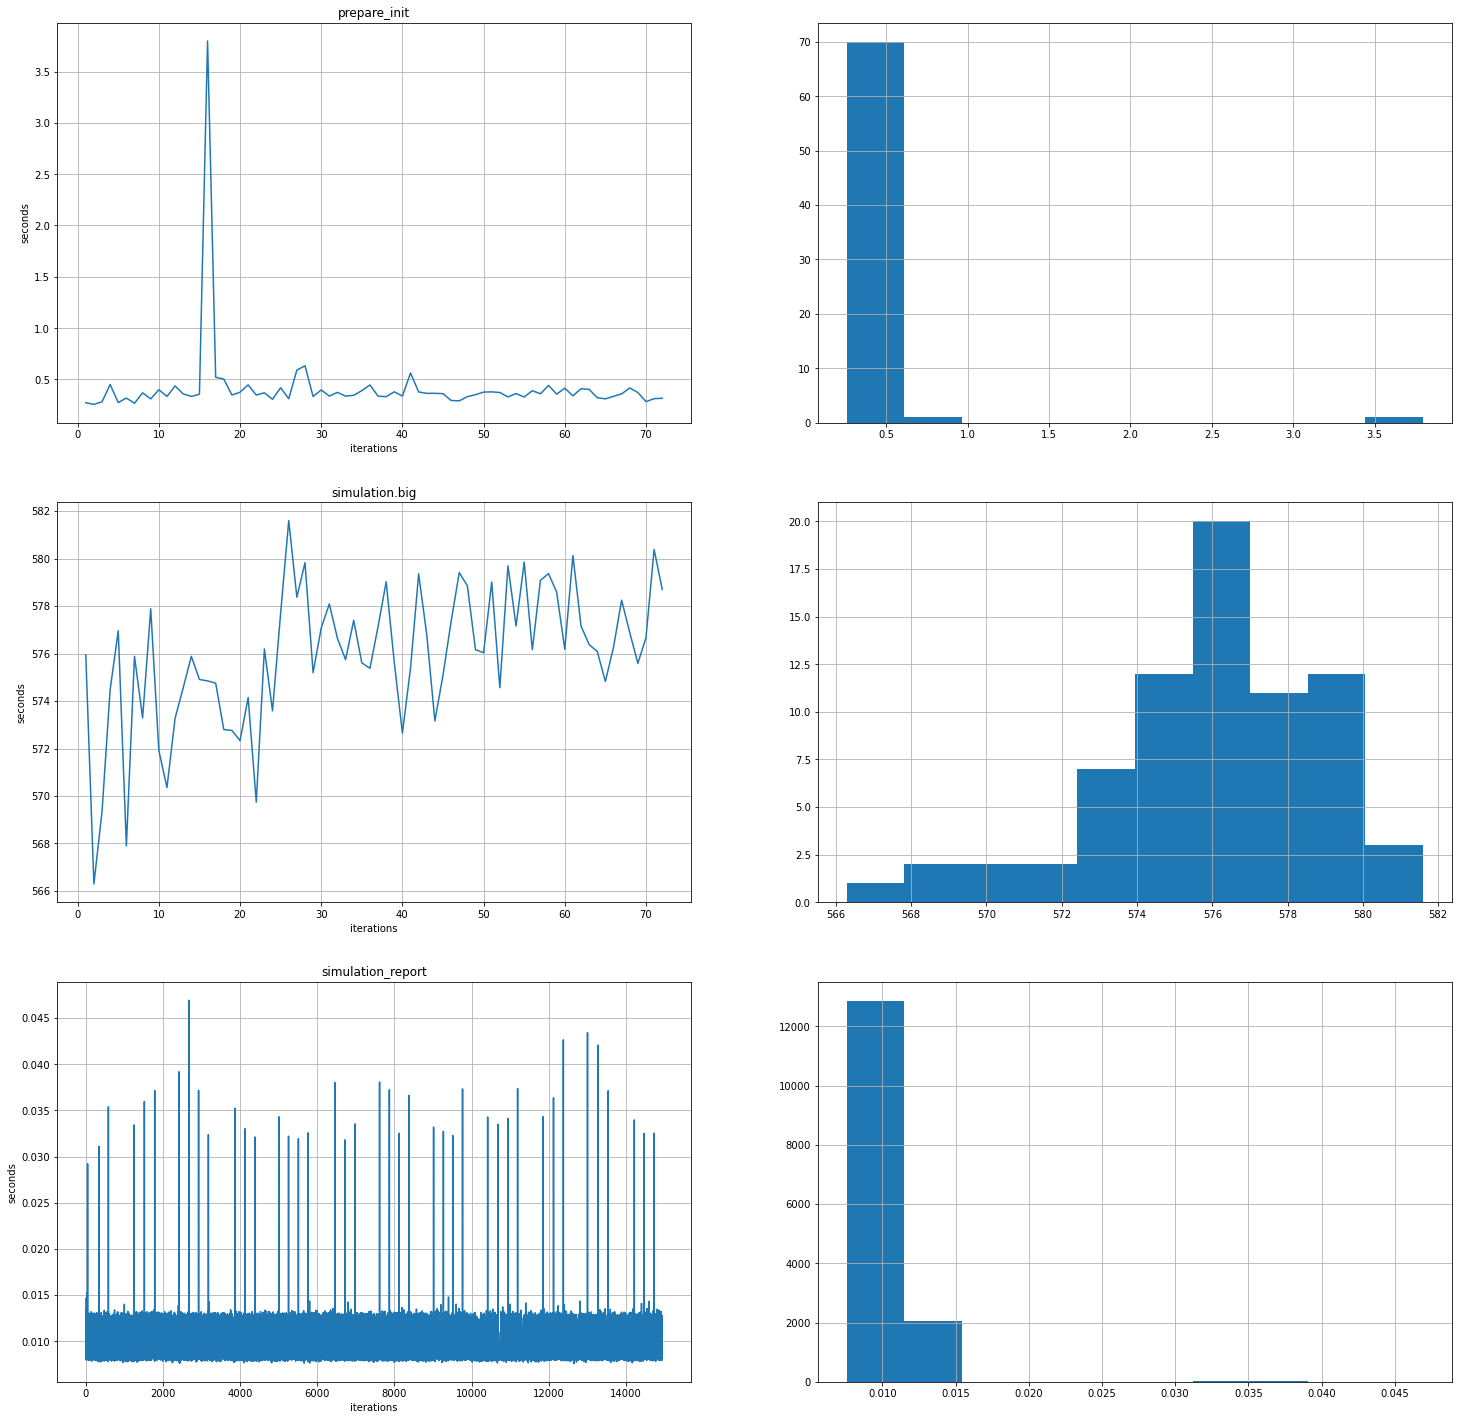

In [66]:
ind = 0
keys = list(pfd[ind].keys())
n = len(keys)

keys = list(set(keys) - set(['prepare', 'lock4', 'find_best_pdb', 'openmm_simulate', 'pre_simulation', 'simulation.step']))
fig, axes = plt.subplots(nrows=len(keys), ncols=2)

simulation_durations = {}

for i,k in enumerate(keys):
    pf = pfd[ind][k]['duration1'][1:]
    simulation_durations[k] = pf.to_list()
    pf.plot(ax=axes[i,0], title=k, figsize=(25,25), xlabel="iterations", ylabel="seconds",grid=True)
    pf.hist(ax=axes[i,1], figsize=(25,25))
    print(k)
    print(pf.describe())
    print('='*30)

In [67]:
total_simulation_iteration = sum(pfd[ind]['simulation.big']['duration'])
total_simulation_report = sum(pfd[ind]['simulation_report']['duration'])
total_simulation_prepare = sum(pfd[ind]['prepare_init']['duration'])

In [68]:
p_simulation_report = total_simulation_report/total_simulation_iteration*100
print(p_simulation_report)

0.3901510645890329


In [69]:
p_simulation_prepare = total_simulation_prepare/total_simulation_iteration*100
print(p_simulation_prepare)

0.1641489235161175


aggregator_iteration
count    12985.000000
mean         3.309636
std          0.050905
min          3.208417
25%          3.276421
50%          3.302806
75%          3.337333
max          4.730255
Name: duration1, dtype: float64
aggregator_wait1
count    12986.000000
mean         0.000114
std          0.000007
min          0.000100
25%          0.000112
50%          0.000113
75%          0.000114
max          0.000330
Name: duration1, dtype: float64
aggregator_wait2
count    12986.000000
mean         0.000104
std          0.000008
min          0.000092
25%          0.000102
50%          0.000103
75%          0.000104
max          0.000399
Name: duration1, dtype: float64
aggregator_internal_loop
count    12985.000000
mean         3.301833
std          0.050902
min          3.200805
25%          3.268621
50%          3.295048
75%          3.329425
max          4.722267
Name: duration1, dtype: float64
aggregator_read
count    156161.000000
mean          0.002396
std           0.000467
min

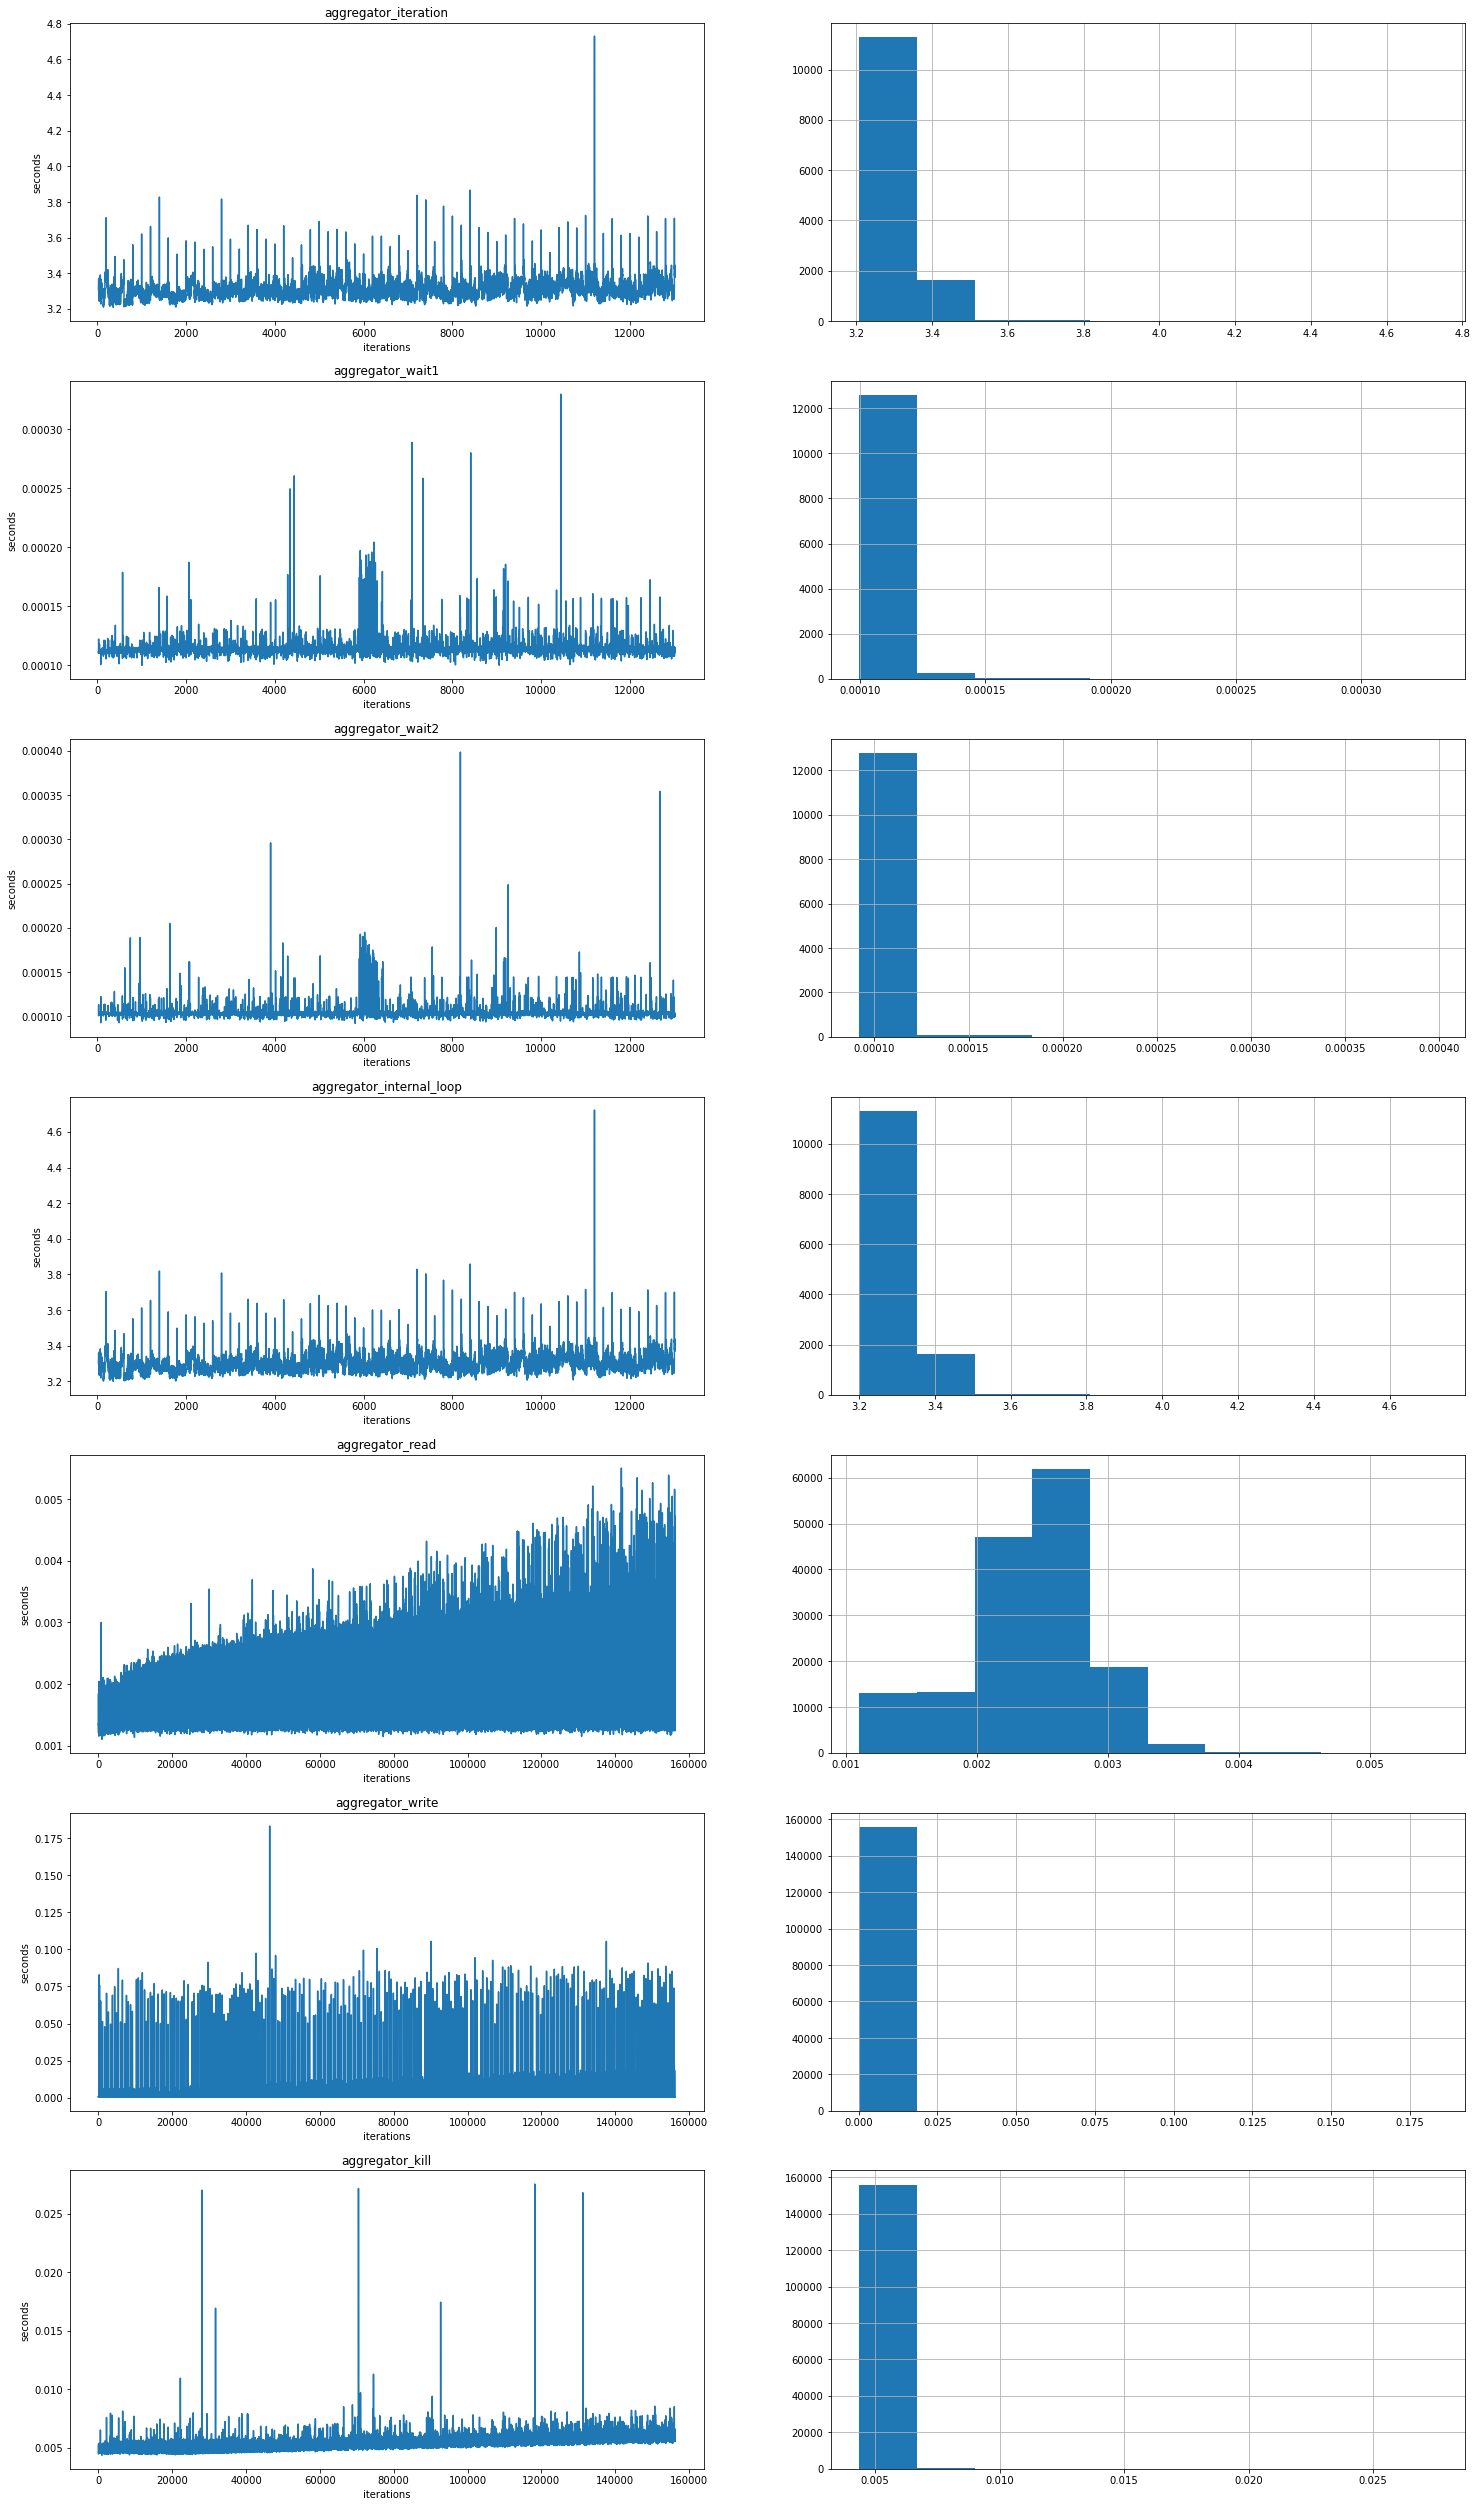

In [71]:
ind = 129
keys = list(pfd[ind].keys())
n = len(keys)
fig, axes = plt.subplots(nrows=n, ncols=2)
for i,k in enumerate(keys):
    pf = pfd[ind][k]['duration1'][30:]
    pf.plot(ax=axes[i,0], title=k, figsize=(25,45), xlabel="iterations", ylabel="seconds")
    pf.hist(ax=axes[i,1], figsize=(25,45))
    print(k)
    print(pf.describe())
    print('='*30)

In [73]:
total_aggregator_iteration = sum(pfd[ind]['aggregator_iteration']['duration1'])
total_aggregator_read = sum(pfd[ind]['aggregator_read']['duration1'])
total_aggregator_write = sum(pfd[ind]['aggregator_write']['duration1'])
total_aggregator_kill = sum(pfd[ind]['aggregator_kill']['duration1'])

In [74]:
p_aggregator_read = total_aggregator_read/total_aggregator_iteration*100
print(p_aggregator_read)

0.8686100914194765


In [75]:
p_aggregator_write = total_aggregator_write/total_aggregator_iteration*100
print(p_aggregator_write)

0.26138131295950073


In [76]:
p_aggregator_kill = total_aggregator_kill/total_aggregator_iteration*100
print(p_aggregator_kill)

1.9229309757353756


#### Total

In [77]:
(total_simulation_report*120 + 10*(total_aggregator_read + total_aggregator_write) + total_cvae_read + total_outlier_read)/(3600*(120+10+1+1)*12)*100

0.8583055638388913

In [78]:
total_simulation_report*120/(3600*120*12)*100

0.37962962962962965